<a href="https://colab.research.google.com/github/marianayarce1224/lab_biosenales/blob/main/PROYECTO3/Proyecto3_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p>

<h1><b>Proyecto 3: Filtros</b></h1>
<h4><b>Bioseñales y sistemas<br>Universidad de Antioquia, Facultad de Ingeniería - Bioingeniería<br>2024-2</b></h4><br>

<h4><b>Grupo:</b> 3</h4>
<h4><b>Integrantes:</b> Mariana Álvarez Yarce - Ana María Seguro Acevedo</h4>

#<b>Contexto del problema</b>

<h4>Las enfermedades cardiovasculares son una de las principales causas de muerte global, con 17,9 millones de muertes en 2019 según la OMS. Su riesgo se incrementa por factores como el tabaquismo, hipertensión, sedentarismo, obesidad, entre otras condiciones.</h4>

<h4>La tecnología, incluyendo sensores en dispositivos de Electrocardiografía (ECG), puede mejorar tratamientos y seguimientos. La medición de parámetros como frecuencia cardíaca y presión arterial es esencial, aunque su variabilidad requiere datos de grandes muestras para construir modelos diagnósticos precisos. El avance respecto a bioseñales implica organizar la cantidad de datos necesaria sobre diversas enfermedades cardiovasculares, mediante un procesado y etiquetado adecuados, con el fin de construir modelos para diagnóstico o predicción. El enfoque de grandes volúmenes de datos permite validar el procesamiento y análisis en diferentes poblaciones y tecnologías, aumentando la pertinencia de las tecnologías desarrolladas.</h4>

<h4>El ECG, que registra la actividad eléctrica del corazón, es fundamental en la detección de problemas cardiovasculares. Se utiliza un sistema de 12 derivaciones, combinando electrodos en extremidades y tórax para obtener una visión integral de la función cardíaca, con amplitudes de señal de 10 µV a 4 mV y frecuencias relevantes de 0,05 a 100 Hz <b>[1]</b>.</h4>

#<b>Origen de los datos</b>

<h4>La base de datos para el desarrollo del proyecto se basa en una investigación de ECG, establecida por la Universidad de Chapman y el Hospital del Pueblo de Shaoxing. La investigación tiene por objetivo estudiar las señales biomédicas cardiovasculares a través de extensas simulaciones por computadora. Aborda condiciones como la fibrilación auricular, que impactan significativamente en la salud pública y los costos médicos. La base de datos incluye 10,646 ECG de 12 derivaciones muestreados a 500 Hz, con 11 ritmos comunes y 67 condiciones <b>[2]</b>.</h4>

#<b>Entregable</b>

##<h4><b>1. </b>Del artículo <b>[3]</b>, consultar y explicar los dos métodos de reducción de ruido usados en el artículo: Robust LOESS y Non Local Means. Mostrar cómo se podrían implementar en Python.</h4>

<b>Robust LOESS (Locally Estimated Scatterplot Smoothing):</b> Es un método de reducción de ruido aplicable a señales no paramétricas, que funciona con el ajuste de una función de regresión para un conjunto de datos a partir de una ventana deslizante. La ventana toma diferentes valores locales y realiza un ajuste por mínimos cuadrados ponderados, de acuerdo a un parámetro de suavización $α$, que se puede establecer en el siguiente rango:

<h4>$(λ + 1)/n \lt α \lt 1$</h4>

<b>Donde</b>
> $λ$ es el grado del polinomio local<br>
$n$ es el número de datos de la señal

Valores más cercanos a la unidad, resultan en curvas más suaves, mientras que valores pequeños del parámetro pueden implicar un sobreajuste de la curva a los datos. Se recomienda definir $\alpha$ en un rango aproximado de 0,25 a 0,5 <b>[4]</b>.

Esta técnica es relativamente resistente a valores atípicos o ruido en los datos, teniendo en cuenta el tipo de regresión que se utilice, lo que depende de la tendencia de dispersión de los datos. Por lo general, se usa una regresión polinómica de grado 2 en adelante, o una regresión lineal si la distribución de puntos no tiene un patrón tan desordenado o si se desea obtener una función menos compleja que no se ajuste con gran precisión a todos los datos, necesariamente. El proceso para aplicar este método de suavizado se describe así:

><b>1. Selección de datos con ventanas locales:</b> se recorren los valores del vector de datos con una ventana, definida por el parámetro de suavizado ($α$), que abarca los puntos más cercanos a un valor central.<br>
<b>2. Ponderación de puntos:</b> se calculan pesos de los puntos de acuerdo a su distancia del valor central de la ventana local; mientras más cerca estén del centro, más peso se les asigna.<br>
<b>3. Función de regresión local:</b> luego de definir los pesos de cada punto dentro de la ventana, se construye una función de regresión polinómica (la regresión lineal cuenta como una polinómica de grado 1) con dichos pesos como coeficientes de los puntos vecinos. Los datos atípicos se caracterizan por presentar una mayor distancia del punto central en cierta ventana, por lo que se les asigna un peso menor y no tiene una influencia significativa en la estimación del modelo final.

A continuación, se presenta la implementación de este método en código. Se importa el módulo ```statsmodels.api```que tiene la función ```lowess``` para aplicar el suavizado de dispersión estimado localmente. Se deben definir parámetros como el porcentaje de datos a tomar en la ventana local (equiparable a definir $α$) y las iteraciones de estimación de cada ventana.

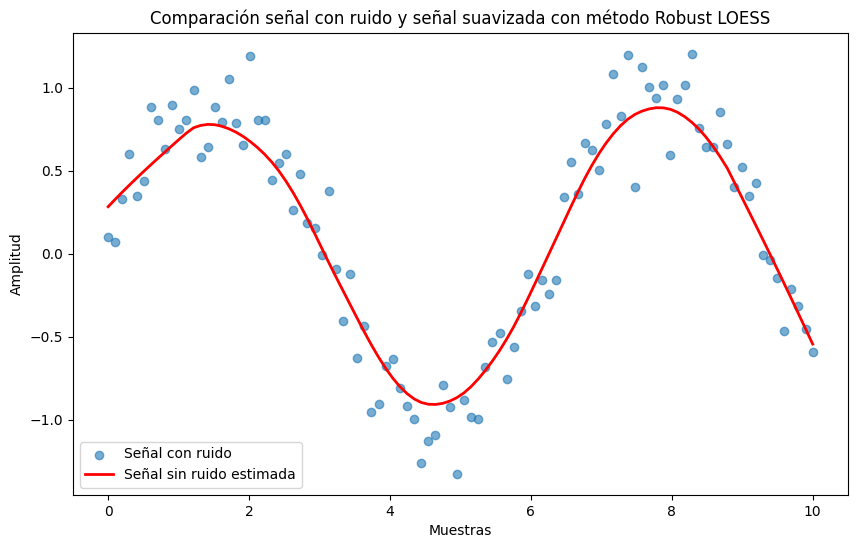

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(42)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.2, 100)

alpha = 0.25
iterations = 3
lowess = sm.nonparametric.lowess(y, x, frac=alpha, it=iterations)
y_smoothed = lowess[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Señal con ruido", alpha=0.6)
plt.plot(x, y_smoothed, label="Señal sin ruido estimada", color='red', linewidth=2)
plt.legend()
plt.title('Comparación señal con ruido y señal suavizada con método Robust LOESS')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

<b>Non-Local Means (NLM):</b> Es un método para reducir ruido en imágenes, señales y demás tipos de conjuntos de datos. Consiste en la estimación de valores por comparación con puntos adyacentes o con puntos de características similares que no necesariamente son vecinos, pero se encuentran en una ventana local. La comparación de puntos se desarrolla mediante la medición de la distancia euclidiana cuadrada entre parches (que equivalen a ventanas locales que encierra solo una porción de los datos) centrados en diferentes puntos. A partir del cálculo de la distancia, se definen pesos para promediar los valores de la señal en diferentes proporciones de los puntos del parche <b>[5]</b>.

Para construir el algoritmo de NLM, se consideran las siguientes expresiones:

<h4>$\hat{u}_i(p) = \frac{1}{C(p)} \sum_{q \in B(p, r)} u_i(q)w(p, q), \quad
C(p) = \sum_{q \in B(p, r)} w(p, q) , \quad w(p, q) = e^{-\frac{\max(d^2 - 2\sigma^2, 0.0)}{h^2}}
$</h4>

<b>Donde</b>
> $\hat{u}_i(p)$ es un valor $i$ filtrado de la señal centrada en $p$<br>
$B(p,r)$ es un parche centrado en $p$ con tamaño $(2r+1) × (2r+1)$<br>
$w(p,q)$ es el peso de los valores de la señal (donde $d^2=d^2(B(p,f),B(q,f))$, $σ$ es la desviación estándar y $h$ es un parámetro de filtrado definido según $σ$)<br>
$u_i(q)$ es un valor original de la señal centrado en $q$

Aplicar este método a bioseñales, se puede mejorar su calidad al reducir el ruido debido a interferencia eléctrica o artefactos de movimiento sin afectar gravemente los componentes carácterísticos de la señal. Algunos pasos que comúnmente se aplican para este método son los siguientes:

><b>1. Definición de parche o ventana: </b> se define un área de puntos que abarca el parche o ventana donde se hace la comparación de similitud. Esta área debe ser amplia si se requiere establecer similitudes entre puntos no cercanos.<br>
<b>2. Ponderación de datos similares:</b> mediante el cálculo de la distancia euclídea se calculan las similitudes entre el punto central y los demás puntos, y a partir de la distancia se asignan pesos para cada punto comparado.<br>
<b>3. Suavizado:</b> se remplazan los valores que contiene ruido por nuevos valores estimados con la media ponderada de la ventana local o parche.

A continuación, se presenta la implementación de este método en código. Se deben definir parámetros como el tamaño del parche o ventana, el tamaño de ventana de búsqueda de parches cercanos o similares, y el parámetro de filtrado $h$ para la función de pesos $w(p,q)$.

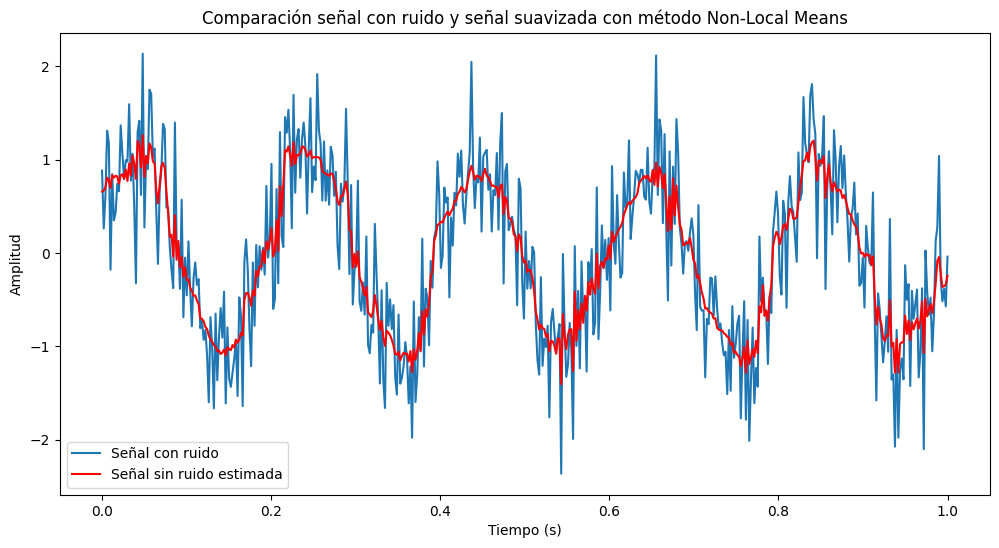

In [ ]:
def non_local_means(signal, patch_size=5, search_window=20, h=1.0):
    n = len(signal)
    filtered_signal = np.zeros(n)
    normalization = np.zeros(n)

    half_patch = patch_size // 2
    half_window = search_window // 2

    padded_signal = np.pad(signal, (half_patch, half_patch), mode='symmetric')
    for i in range(n):
        patch_i = padded_signal[i:i + patch_size]
        weights_sum = 0
        weighted_value_sum = 0

        for j in range(max(i - half_window, 0), min(i + half_window + 1, n)):
            if j == i:
                continue

            patch_j = padded_signal[j:j + patch_size]
            d2 = np.sum((patch_i - patch_j) ** 2) / patch_size
            weight = np.exp(-max(d2 - 2 * h**2, 0) / h**2)
            weights_sum += weight
            weighted_value_sum += weight * signal[j]
        filtered_signal[i] = (weighted_value_sum + signal[i]) / (weights_sum + 1)
    return filtered_signal

np.random.seed(0)
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.normal(size=t.shape)
denoised_signal = non_local_means(signal, patch_size=5, search_window=20, h=0.5)

plt.figure(figsize=(12, 6))
plt.plot(t, signal, label="Señal con ruido")
plt.plot(t, denoised_signal, label="Señal sin ruido estimada", color='red')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Comparación señal con ruido y señal suavizada con método Non-Local Means')
plt.show()

##<h4><b>2. </b>De la base de datos extraer los registros que correspondan a bradicardia sinusal (<i>SB Sinus Bradycardia</i>) y fibrilación auricular (<i>AFIB Atrial Fibrillation</i>).</h4>



Para fines prácticos de este proyecto, se filtraron los datos de acuerdo a los valores de la columna <i>Rhythm</i> correspondientes a <i>SB</i> o <i>AFIBB</i>. Este proceso, junto con la eliminación de las columnas diferentes de la derivación II en los archivos .csv, se realizó a través del código en el siguiente <a href="https://colab.research.google.com/drive/1sMFf2cTo8-dqhe6M75dvQLkE-cEPaHih?usp=sharing" target="_blank">enlace</a>.

Posteriormente, se hizo un lista de todos los registros, tanto para SB como para AFIB, para acceder a los datos a través de rutas cuando se requiera. Esto es más manejable y no consume tantos recursos computacionales cada vez que se ejecuta el código.

In [114]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [115]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal, fft, stats

ruta_SB = '/content/drive/MyDrive/ECGData/ECGData_SB/'
lista_archivos_SB = glob.glob(ruta_SB + '*.csv')
ruta_AFIB = '/content/drive/MyDrive/ECGData/ECGData_AFIB/'
lista_archivos_AFIB = glob.glob(ruta_AFIB + '*.csv')
print(f'\nCantidad archivos = {len(lista_archivos_SB) + len(lista_archivos_AFIB)}')


Cantidad archivos = 5669


##<h4><b>3. </b>Consultar qué otros tipos de señales wavelet se pueden usar para el análisis de señales ECG y adaptar el código del filtro wavelet que se entrega en el curso de acuerdo a la consulta.</h4>

<b>Selección de la Wavelet</b>

Para el análisis de las señales de electrocardiograma (ECG) en este Proyecto se ha elegido la wavelet madre Daubechies 4 (db4), tras realizar una revisión exhaustiva de la literatura. Diversos estudios han demostrado que la familia de wavelets Daubechies es especialmente adecuada para la detección y caracterización de los complejos QRS en señales ECG, debido a su capacidad para identificar transiciones rápidas y detectar con precisión ondas características como las ondas R y S <b>[8]</b>.

Además de la Daubechies 4, se consideraron otras wavelets como la Daubechies 8, Symlet 6 y Symlet 8, las cuales también se mencionan en la literatura para el análisis de ECG. La Daubechies 8 fue valorada debido a que, al igual que la Daubechies 4, proporciona una buena localización de los puntos Q y S en los complejos QRS; sin embargo, sufre de una mayor incidencia de detecciones falsas en señales ruidosas, lo cual reduce la precisión general en la identificación de latidos reales. Por su parte, la Symlet 6 y la Symlet 8 presentan una buena detección de las ondas R y logran captar el complejo QRS completo, pero también presentan un alto número de falsos positivos en algunas señales específicas, lo que afecta su fiabilidad. En particular, se observó que la Symlet 8 tiene una tendencia a detectar picos inexistentes en presencia de ruido, lo que la hace menos ideal en comparación con la Daubechies 4 <b>[6,8]</b>.

Según González, López y Jaramillo <b>[7]</b>, la Daubechies 4 ofrece un ajuste óptimo a las características de la señal ECG, destacándose por su similitud en forma y su capacidad para captar las variaciones abruptas propias de los complejos QRS. Este aspecto es esencial para evitar errores de detección, sobre todo en presencia de ruido. Asimismo, Quintana Morales <b>[6]</b> demostró que la wavelet Daubechies proporciona resultados superiores en comparación con otras wavelets en términos de precisión y confiabilidad en la detección de latidos, lo que la hace ideal para aplicaciones en medicina, especialmente en análisis de ECG.

A partir de esta revisión bibliográfica, se concluye que la wavelet Daubechies 4 es la mejor opción para el análisis de señales ECG en este proyecto, debido a su capacidad para proporcionar un alto nivel de precisión en la identificación de latidos reales y una baja tasa de detecciones falsas, lo cual es fundamental para un análisis fiable y clínicamente relevante de las señales cardíacas <b>[8]</b>.


In [ ]:
!pip install PyWavelets

In [ ]:
import pywt

def filter_ecg_wavelet(ecg_signal, wavelet_type='db4', level=3):
    data_wavelet = pywt.wavedec(ecg_signal, wavelet_type, level=level)
    details = data_wavelet[1:]

    def wnoisest(coeff):
        stdc = np.zeros((len(coeff), 1))
        for i in range(len(coeff)):
            stdc[i] = (np.median(np.abs(coeff[i]))) / 0.6745
        return stdc

    def threshold(coeff):
        Num_samples = sum([c.shape[0] for c in coeff])
        thr = np.sqrt(2 * np.log(Num_samples))
        return thr

    def wthresh(coeff):
        y = []
        s = wnoisest(coeff)
        thr = threshold(coeff)
        for i in range(len(coeff)):
            y.append(np.multiply(coeff[i], np.abs(coeff[i]) > (thr * s[i])))
        return thr, s, y

    thr, s, details_t = wthresh(details)
    coeff = [data_wavelet[0]] + details_t
    x_rec = pywt.waverec(coeff, wavelet_type)
    x_rec = x_rec[:ecg_signal.shape[0]]

    return x_rec

In [ ]:
from scipy.signal import find_peaks

def detectar_picos_R(ecg_signal, distancia_minima, umbral):
    picos, _ = find_peaks(ecg_signal, distance=distancia_minima, height=umbral)
    return picos

In [ ]:
def particionar_por_ciclos(ecg_signal, picos_R, muestras_antes, muestras_despues):
    ciclos = []
    for pico in picos_R:
        inicio = max(0, pico - muestras_antes)
        fin = min(len(ecg_signal), pico + muestras_despues)
        ciclos.append(ecg_signal[inicio:fin])
    return ciclos

##<h4><b>4. </b>Escoger 10 señales al azar y aplicar un flujo de procesamiento que conste de:</h4>

<blockquote><h4><b>Flujo 1:</b></h4><blockquote>
<h4><b>1.</b> Filtro pasa-altas usando filtro IIR a 0.5 Hz<br>
<b>2.</b> Filtro wavelet modificado del punto 3<br>
<b>3.</b> Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR</h4>
</blockquote></blockquote>

<blockquote><h4><b>Flujo 2:</b></h4><blockquote>
<h4><b>1.</b> Detrend<br>
<b>2.</b> Filtro wavelet modificado del punto 3<br>
<b>3.</b> Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR</h4>
</blockquote></blockquote>

<blockquote><h4><b>Flujo 3:</b></h4><blockquote>
<h4><b>1.</b> Filtro pasa-altas usando filtro IIR a 0.5 Hz<br>
<b>2.</b> Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR<br></h4>
</blockquote></blockquote>

<h4>Describir los resultados obtenidos y decidir si el resto del procesamiento se hace con el flujo 1, flujo 2 o flujo 3. Con el flujo seleccionado procesar las señales de la base de datos <i>ECGData.zip</i> (derivación II). En este punto deberíamos estar en el mismo punto donde partimos en el proyecto 2, con señales filtradas.</h4>

<h4>A las señales filtradas con el flujo seleccionado aplicar el procesamiento de normalización usado en el proyecto 2.</h4>

###<b>Flujo 1</b>

Para el flujo 1 se define primero un filtro IIR pasa altas con frecuencia de corte de 0.5 Hz. Se define un orden de 2 y un tipo de filtro Butterworth, según lo que se ha definido en la literatura para un filtro IIR recursivo <b>[9]</b>. La frecuencia de corte normalizada se calcula en base a la frecuencia de muestreo de las señales ECG, la cual según la referencia del origen de los datos es de 500 Hz.

Para corregir la distorsión de fase no lineal del filtro IIR, causada por su recursividad en los coeficientes polinómicos (es decir, que considera valores pasados), se aplica la función ```signal.filtfilt```, la cual aplica el filtro en ambas direcciones de la señal con el fin de evitar el desplazamiento de fase. Este proceso se denomina "filtrado de fase cero" y es importante aplicarlo para preservar el tiempo de ocurrencia real del complejo QRS y demás componentes de la señal ECG <b>[10]</b>.

In [ ]:
def highpass_IIR(raw_signal, order=2, fc=0.5, fs=500):
    nyquist = fs / 2
    w_normalized = fc / nyquist
    b_high, a_high = signal.iirfilter(order, w_normalized, btype='highpass', ftype='butter')
    filtered_signal = signal.filtfilt(b_high, a_high, raw_signal)

    return filtered_signal, b_high, a_high, w_normalized

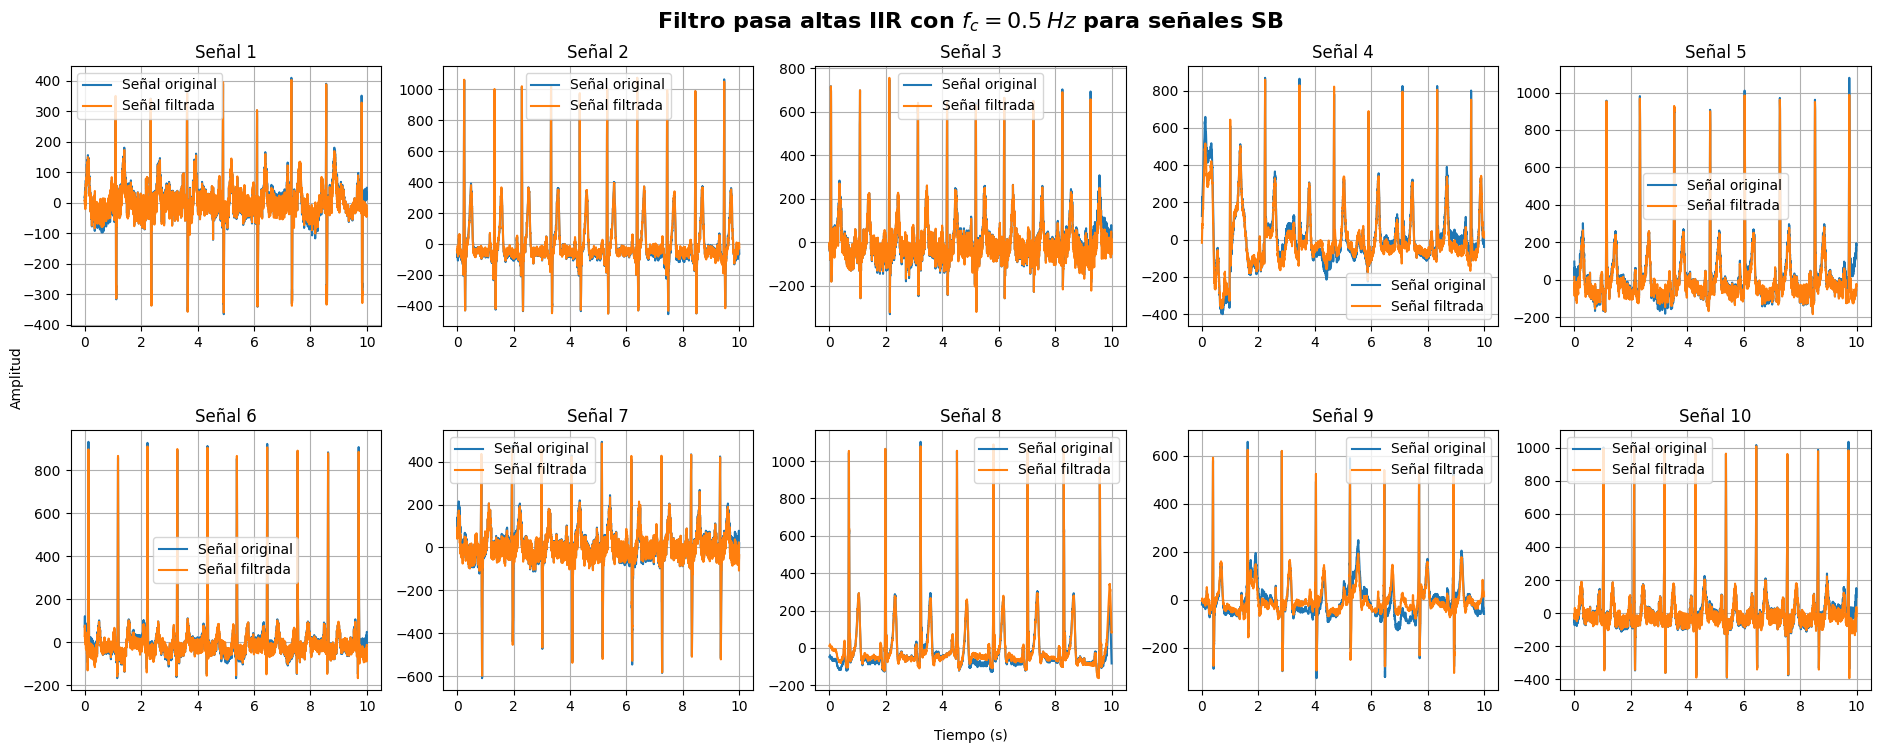

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Filtro pasa altas IIR con $f_c=0.5 \: Hz$ para señales SB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_SB[:10]):
  signal_df = pd.read_csv(archivo, header=None, names=['II'])
  signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
  sig = signal_df['II'].values[1:]
  filtered_signal = highpass_IIR(sig)
  n = np.arange(0, len(filtered_signal[0])/fs, 1/fs)

  ax = axs[i // 5, i % 5]
  if i == 7:
    ax.set_xlabel('Tiempo (s)')
    ax.xaxis.set_label_coords(0.5, -0.15)
  if i == 0:
    ax.set_ylabel('Amplitud')
    ax.yaxis.set_label_coords(-0.15, -0.2)
  ax.set(title=f'Señal {i + 1}')
  ax.plot(n, sig, label='Señal original')
  ax.plot(n, filtered_signal[0], label='Señal filtrada')
  ax.legend()
  ax.grid()
plt.show()

In [ ]:
def mfreqz(b_iir, a_iir, i, w_normalized, type, nyq_rate=1):
    w_iir, h_iir = signal.freqz(b_iir, a_iir);
    h_dB_iir = 20 * np.log10 (abs(h_iir)+1e-10)

    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    fig.suptitle(f'Respuesta al impulso en frecuencia filtro IIR para señal {i} de {type}', x=0.5, y=0.99, fontsize=14, fontweight='bold')
    axs[0].plot((w_iir/max(w_iir))*nyq_rate, abs(h_iir))
    axs[0].set(ylabel='Magnitud', title=r'Respuesta en frecuencia', xticks=np.arange(0, 1, w_normalized/2), xlim=(0, w_normalized*10/2))
    axs[0].axvline(x=w_normalized*nyq_rate, linestyle='--', label='$f_c$', color='red')
    axs[0].legend()
    axs[0].grid()

    axs[1].plot((w_iir/max(w_iir))*nyq_rate, h_dB_iir)
    axs[1].set(ylabel='Magnitud (dB)', xlabel=r'Frecuencia normalizada (x$\pi$rad/sample)', title=r'Respuesta en frecuencia (dB)', xticks=np.arange(0, 1, w_normalized/2), xlim=(0, w_normalized*10/2))
    axs[1].axvline(x=w_normalized*nyq_rate, linestyle='--', label='$f_c$', color='red')
    axs[1].legend()
    axs[1].grid()

    h_Phase = np.unwrap(np.arctan2(np.imag(h_iir),np.real(h_iir))) * (180 / np.pi)
    axs[2].plot((w_iir/max(w_iir))*nyq_rate, h_Phase)
    axs[2].set(ylabel='Fase (rad)', title=r'Respuesta en fase', xticks=np.arange(0, 1, w_normalized/2), xlim=(0, w_normalized*10/2))
    axs[2].axvline(x=w_normalized*nyq_rate, linestyle='--', label='$f_c$', color='red')
    axs[2].legend()
    axs[2].grid()

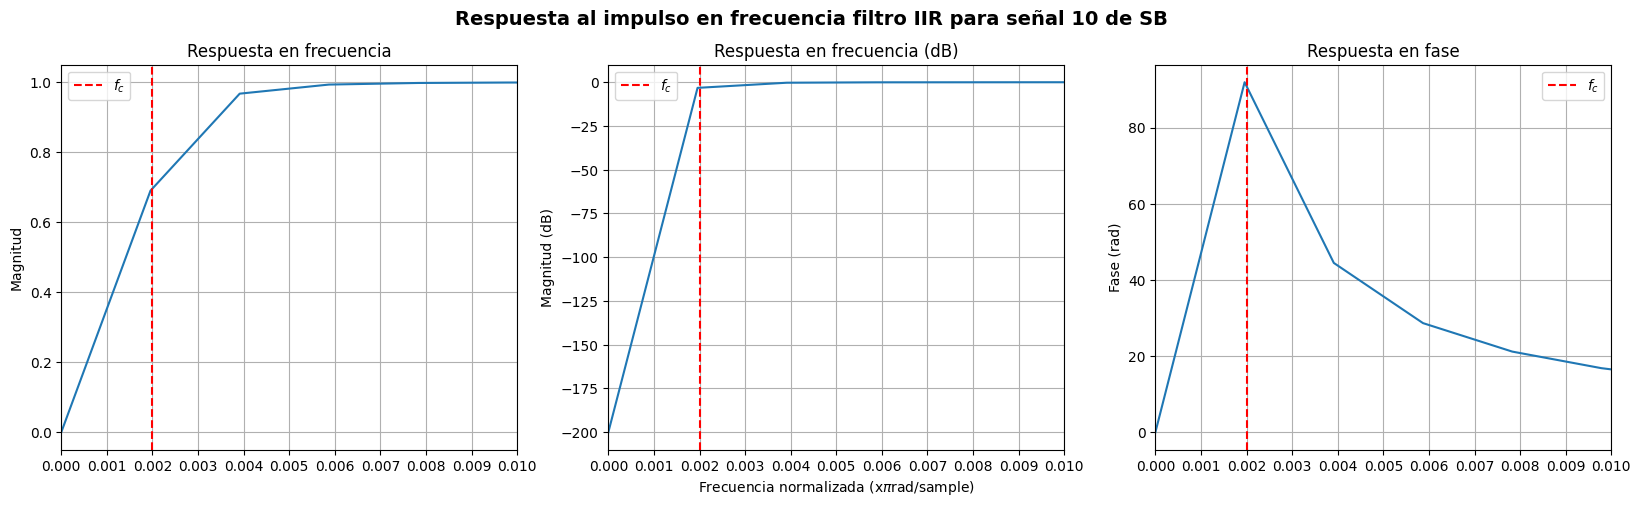

In [ ]:
mfreqz(filtered_signal[1], filtered_signal[2], i+1, filtered_signal[3], 'SB')

Como la frecuencia de corte normalizada resulta en un valor muy cercano a 0 $\big( w_n = \frac{0.5 \: Hz}{500 \: Hz/2} = 0.002 \big)$, puede concluirse que el orden de 2 para el filtro Butterworth cumple con la atenuación deseada de aproximadamente -3 dB o 0.7 (para la magnitud adimensional), y un desfase descendente de las frecuencias altas a partir de la frecuencia de corte que no representa un desplazamiento considerable de los tiempos de la señal. El comportamiento del filtro para las 10 señales seleccionadas se puede generalizar con la respuesta de la última señal.

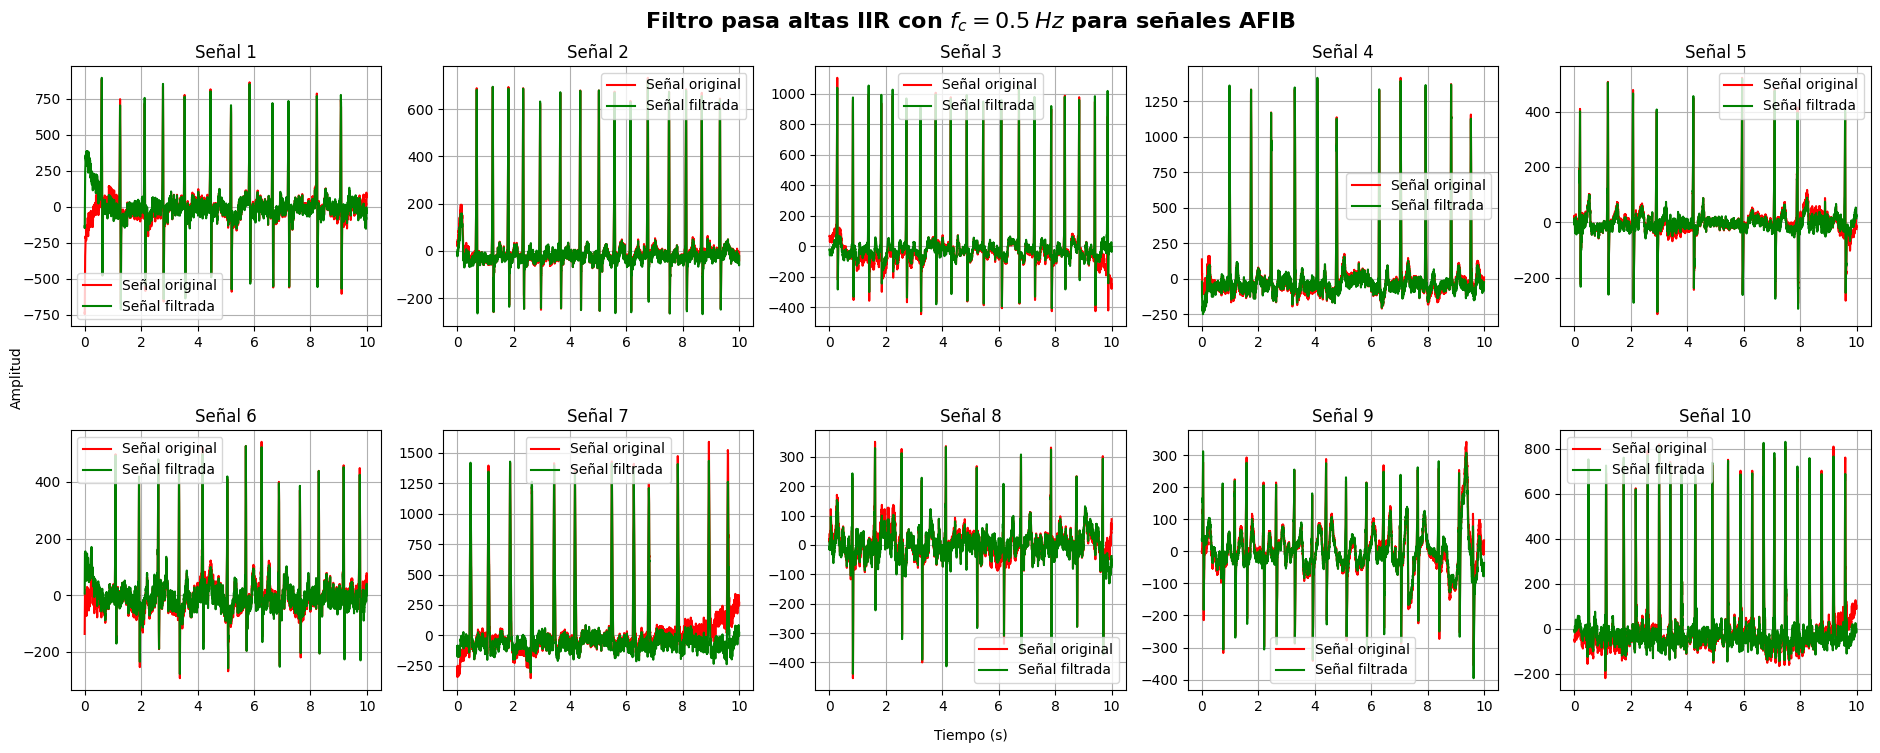

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Filtro pasa altas IIR con $f_c=0.5 \: Hz$ para señales AFIB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_AFIB[:10]):
  signal_df = pd.read_csv(archivo, header=None, names=['II'])
  signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
  sig = signal_df['II'].values[1:]
  filtered_signal = highpass_IIR(sig)
  n = np.arange(0, len(filtered_signal[0])/fs, 1/fs)

  ax = axs[i // 5, i % 5]
  if i == 7:
    ax.set_xlabel('Tiempo (s)')
    ax.xaxis.set_label_coords(0.5, -0.15)
  if i == 0:
    ax.set_ylabel('Amplitud')
    ax.yaxis.set_label_coords(-0.15, -0.2)
  ax.set(title=f'Señal {i + 1}')
  ax.plot(n, sig, label='Señal original', color='red')
  ax.plot(n, filtered_signal[0], label='Señal filtrada', color='green')
  ax.legend()
  ax.grid()
plt.show()

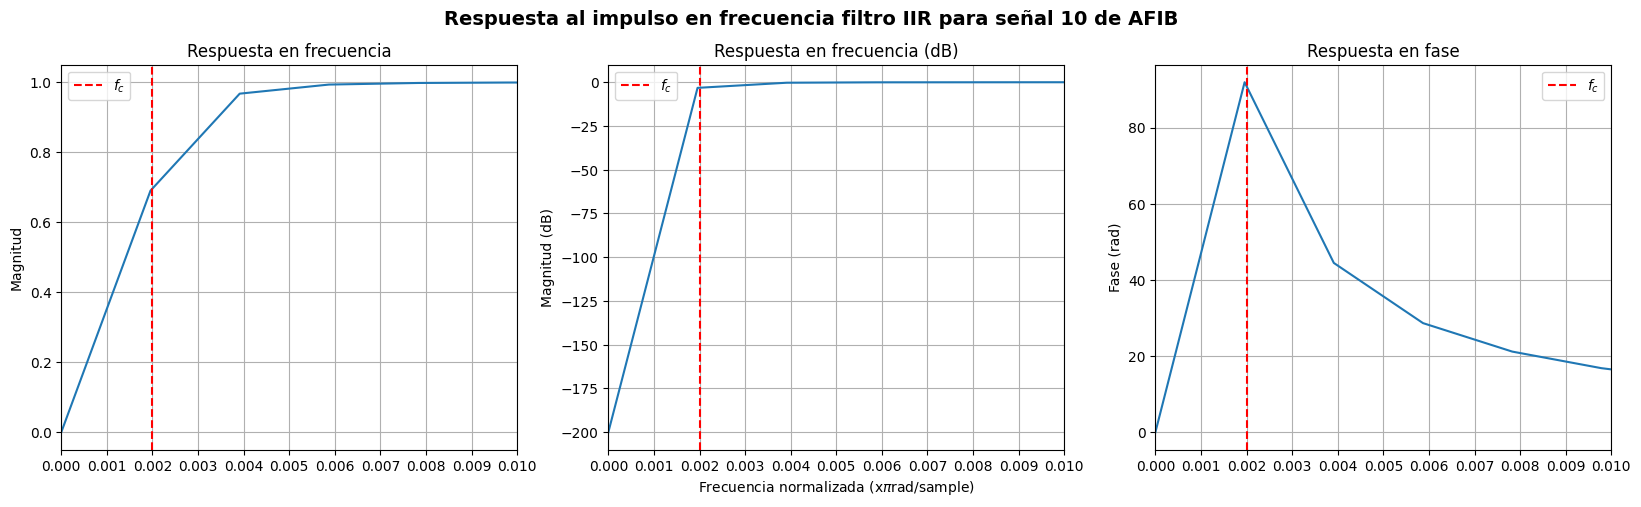

In [ ]:
mfreqz(filtered_signal[1], filtered_signal[2], i+1, filtered_signal[3], 'AFIB')

Luego de aplicar el filtro pasa altas, se implementa el filtrado con el wavelet seleccionado correspondiente al Daubechies 4 (db4). Se observa una atenuación de frecuencias en la línea de base después de aplicar el wavelet, las cuales no se filtraron correctamente solo con el filtro pasa altas anterior.

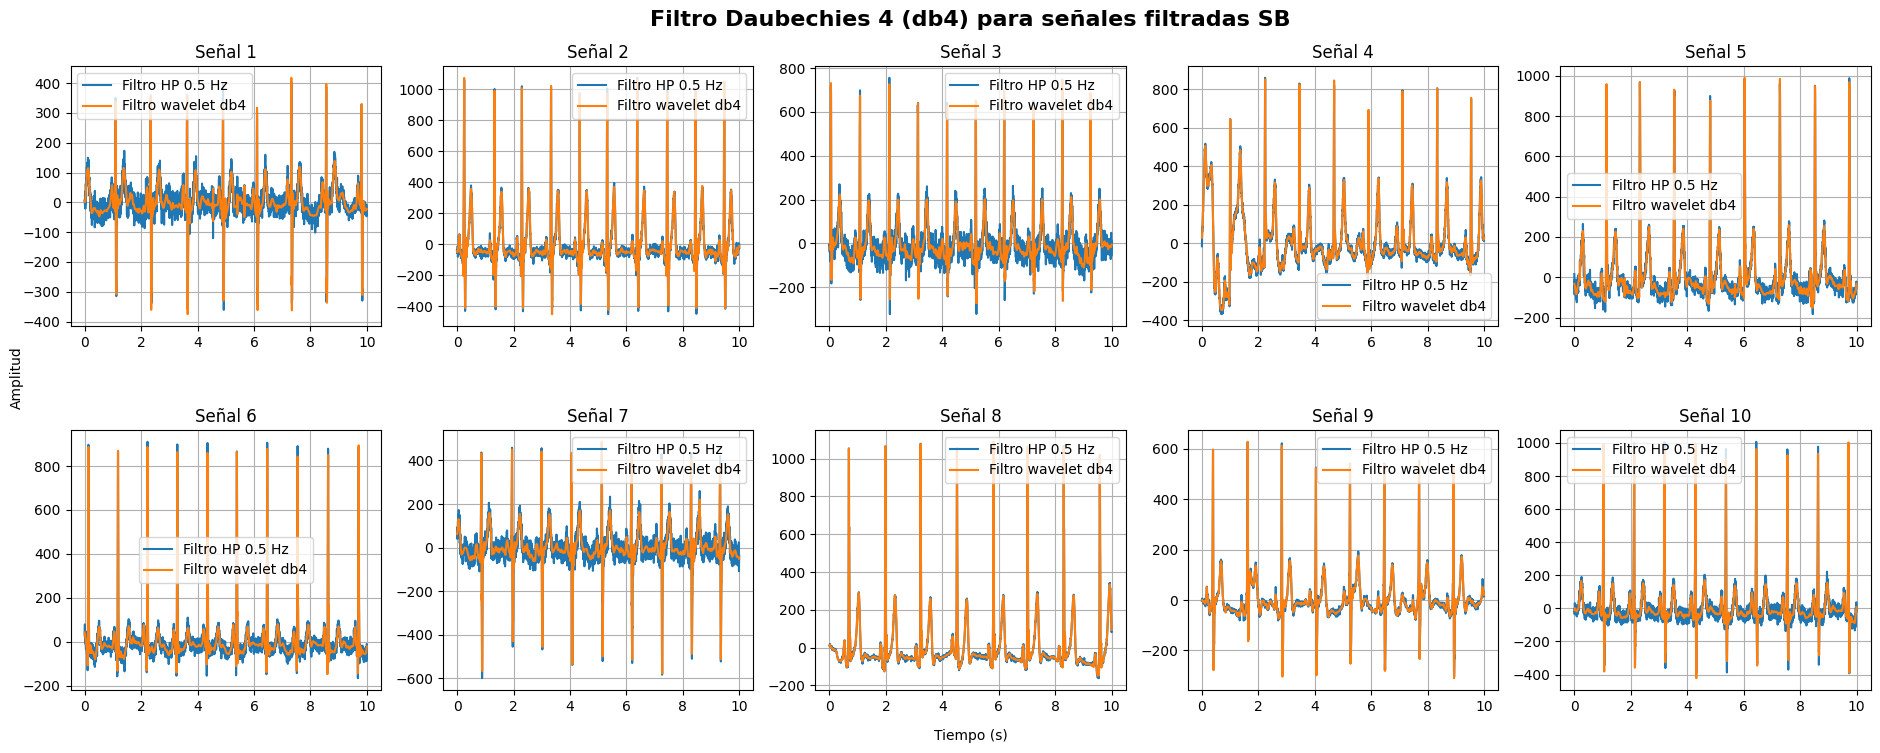

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Filtro Daubechies 4 (db4) para señales filtradas SB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_SB[:10]):
  signal_df = pd.read_csv(archivo, header=None, names=['II'])
  signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
  sig = signal_df['II'].values[1:]
  filtered_signal = highpass_IIR(sig)
  db4_signal = filter_ecg_wavelet(filtered_signal[0], level=4)
  n = np.arange(0, len(db4_signal)/fs, 1/fs)

  ax = axs[i // 5, i % 5]
  if i == 7:
    ax.set_xlabel('Tiempo (s)')
    ax.xaxis.set_label_coords(0.5, -0.15)
  if i == 0:
    ax.set_ylabel('Amplitud')
    ax.yaxis.set_label_coords(-0.15, -0.2)
  ax.set(title=f'Señal {i + 1}')
  ax.plot(n, filtered_signal[0], label='Filtro HP 0.5 Hz')
  ax.plot(n, db4_signal, label='Filtro wavelet db4')
  ax.legend()
  ax.grid()
plt.show()

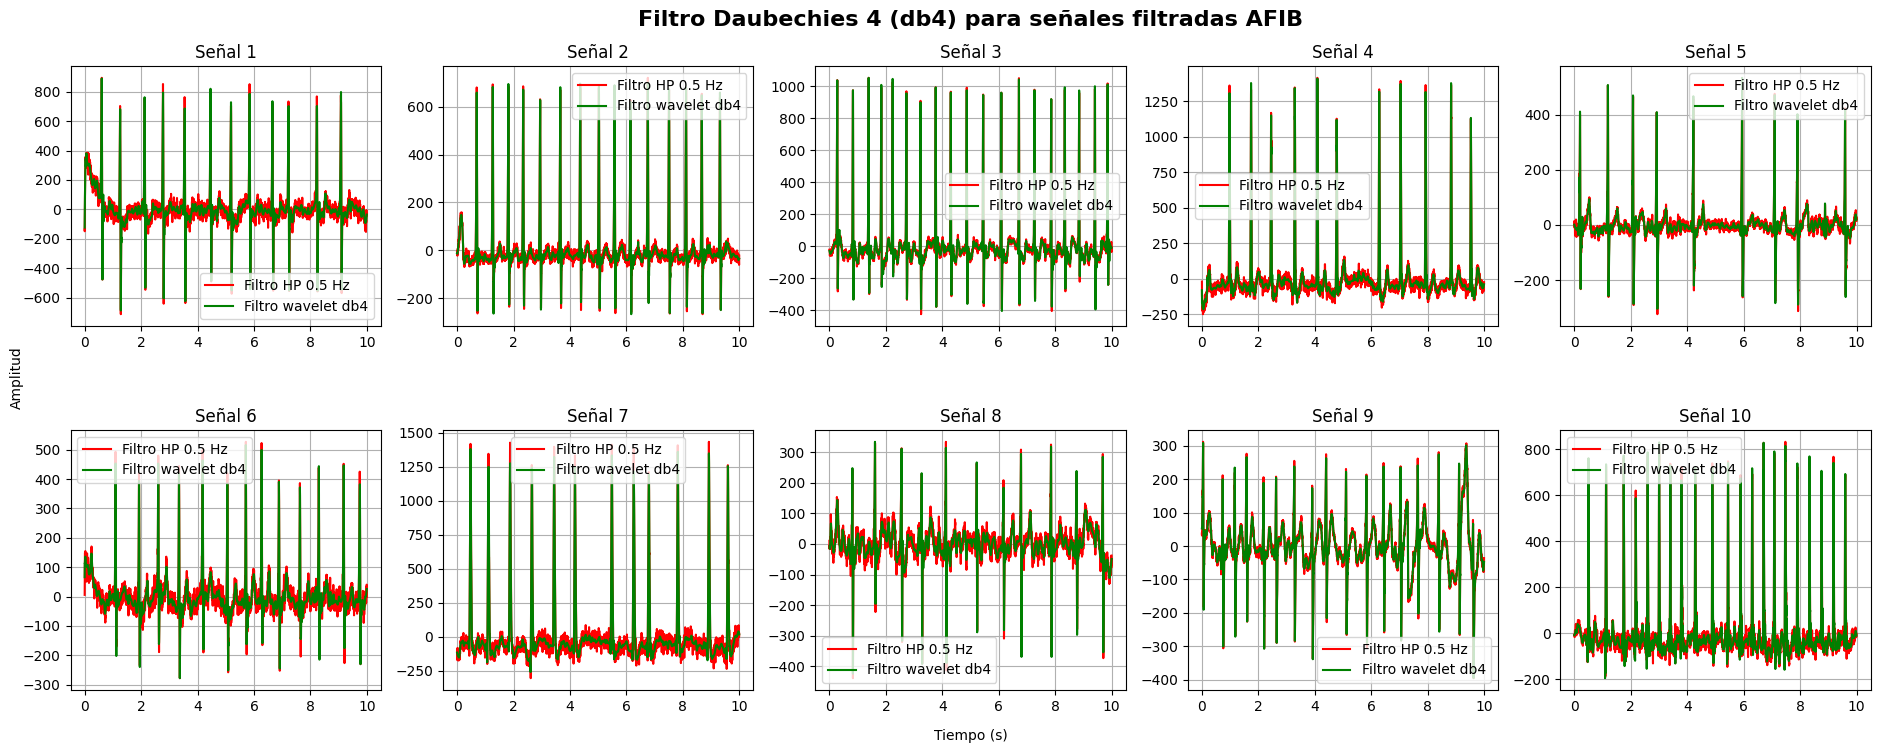

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Filtro Daubechies 4 (db4) para señales filtradas AFIB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_AFIB[:10]):
  signal_df = pd.read_csv(archivo, header=None, names=['II'])
  signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
  sig = signal_df['II'].values[1:]
  filtered_signal = highpass_IIR(sig)
  db4_signal = filter_ecg_wavelet(filtered_signal[0], level=4)
  n = np.arange(0, len(db4_signal)/fs, 1/fs)

  ax = axs[i // 5, i % 5]
  if i == 7:
    ax.set_xlabel('Tiempo (s)')
    ax.xaxis.set_label_coords(0.5, -0.15)
  if i == 0:
    ax.set_ylabel('Amplitud')
    ax.yaxis.set_label_coords(-0.15, -0.2)
  ax.set(title=f'Señal {i + 1}')
  ax.plot(n, filtered_signal[0], label='Filtro HP 0.5 Hz', color='red')
  ax.plot(n, db4_signal, label='Filtro wavelet db4', color='green')
  ax.legend()
  ax.grid()
plt.show()

Posteriormente, se contruye el filtro pasa bajas con $f_c = 50 \: Hz$ de tipo IIR. A pesar de que este tipo de filtro puede presentar distorsión de fase no lineal y puede ser potencialmente menos estable que los de tipo FIR, presenta un gasto computacional y una respuesta de atenuación mejor. Las cuestiones de estabilidad y fase se pueden abordar adecuadamente definiendo parámetros y condiciones específicas, como el filtrado de fase cero, para evitar la distorsión general de los complejos cardíacos de la señal.

Según la literatura <b>[9]</b>, la comparación de complejidad entre los filtros FIR y IIR aplicados a señales ECG, muestra que ambos tipos eliminan eficazmente el ruido de la linea de base de la señal, pero debido al elevado orden de los filtros FIR se produce un retraso en la fase de las ondas filtradas. Por otro lado, el filtro IIR presentó una banda de transición más estrecha lo que implica que se produce una pendiente de atenuación mejor entre la banda pasante y la banda de rechazo.

In [ ]:
def lowpass_IIR(raw_signal, order=2, fc=50, fs=500):
    nyquist = fs / 2
    w_normalized = fc / nyquist
    b_low, a_low = signal.iirfilter(order, w_normalized, btype='lowpass', ftype='butter')
    filtered_signal = signal.filtfilt(b_low, a_low, raw_signal)

    return filtered_signal, b_low, a_low, w_normalized

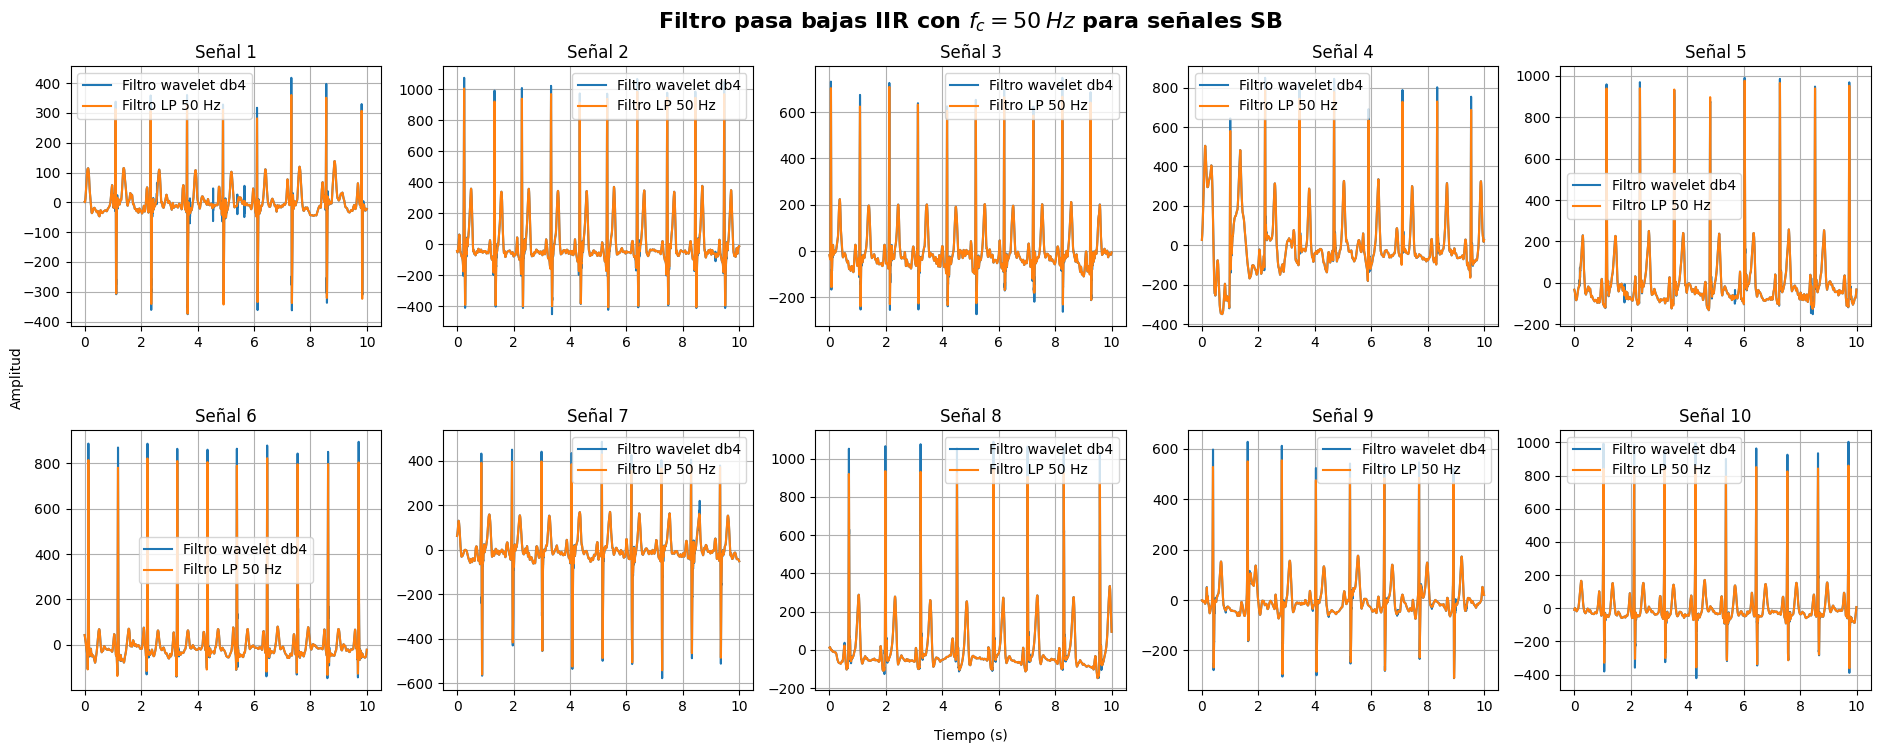

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Filtro pasa bajas IIR con $f_c=50 \: Hz$ para señales SB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_SB[:10]):
  signal_df = pd.read_csv(archivo, header=None, names=['II'])
  signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
  sig = signal_df['II'].values[1:]
  filtered_signal = highpass_IIR(sig)
  db4_signal = filter_ecg_wavelet(filtered_signal[0], level=4)
  filtered_signal = lowpass_IIR(db4_signal)
  n = np.arange(0, len(filtered_signal[0])/fs, 1/fs)

  ax = axs[i // 5, i % 5]
  if i == 7:
    ax.set_xlabel('Tiempo (s)')
    ax.xaxis.set_label_coords(0.5, -0.15)
  if i == 0:
    ax.set_ylabel('Amplitud')
    ax.yaxis.set_label_coords(-0.15, -0.2)
  ax.set(title=f'Señal {i + 1}')
  ax.plot(n, db4_signal, label='Filtro wavelet db4')
  ax.plot(n, filtered_signal[0], label='Filtro LP 50 Hz')
  ax.legend()
  ax.grid()
plt.show()

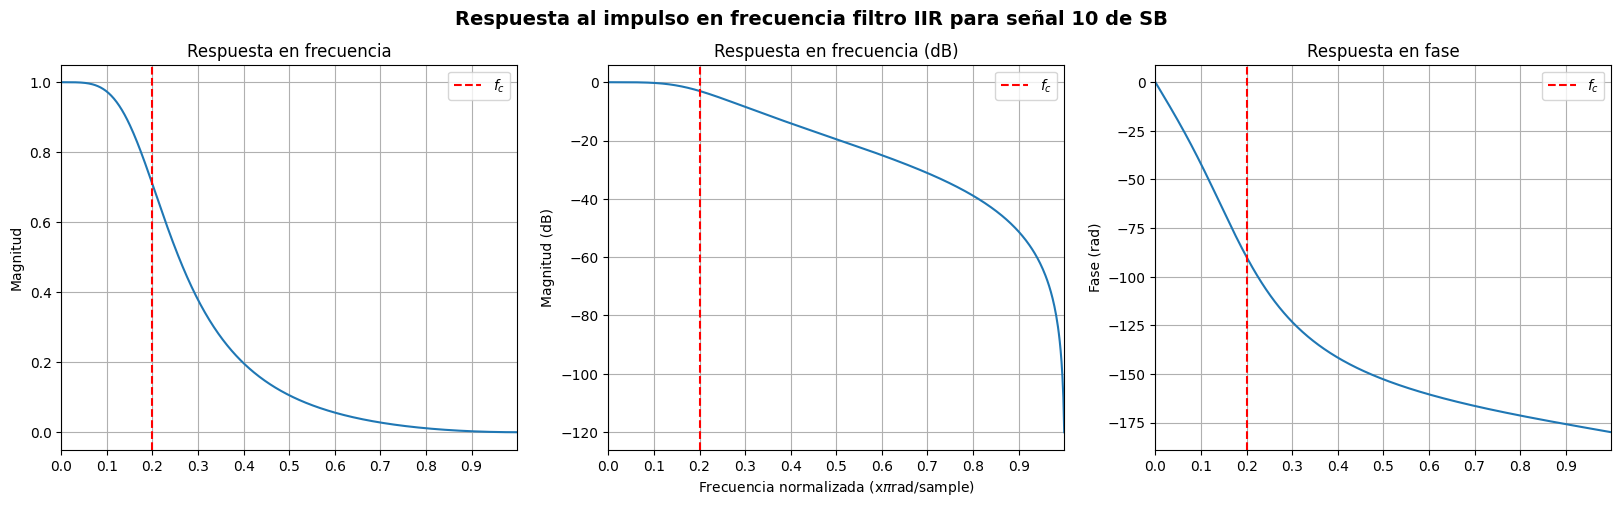

In [ ]:
mfreqz(filtered_signal[1], filtered_signal[2], i+1, filtered_signal[3], 'SB')

Se grafica un diagrama de Bode con la respuesta al impulso del filtro pasa bajas. El comportamiento del filtro es el esperado en cuanto a atenuación de frecuencias por encima de la frecuencia de corte normalizada $\big( w_n = \frac{50 \: Hz}{500 \: Hz/2} = 0.2 \big)$. Se presenta un desfase menor de las frecuencias por debajo de 0.2 Hz y gráficamente no se detecta un desplazamiento temporal significativo de la señal.

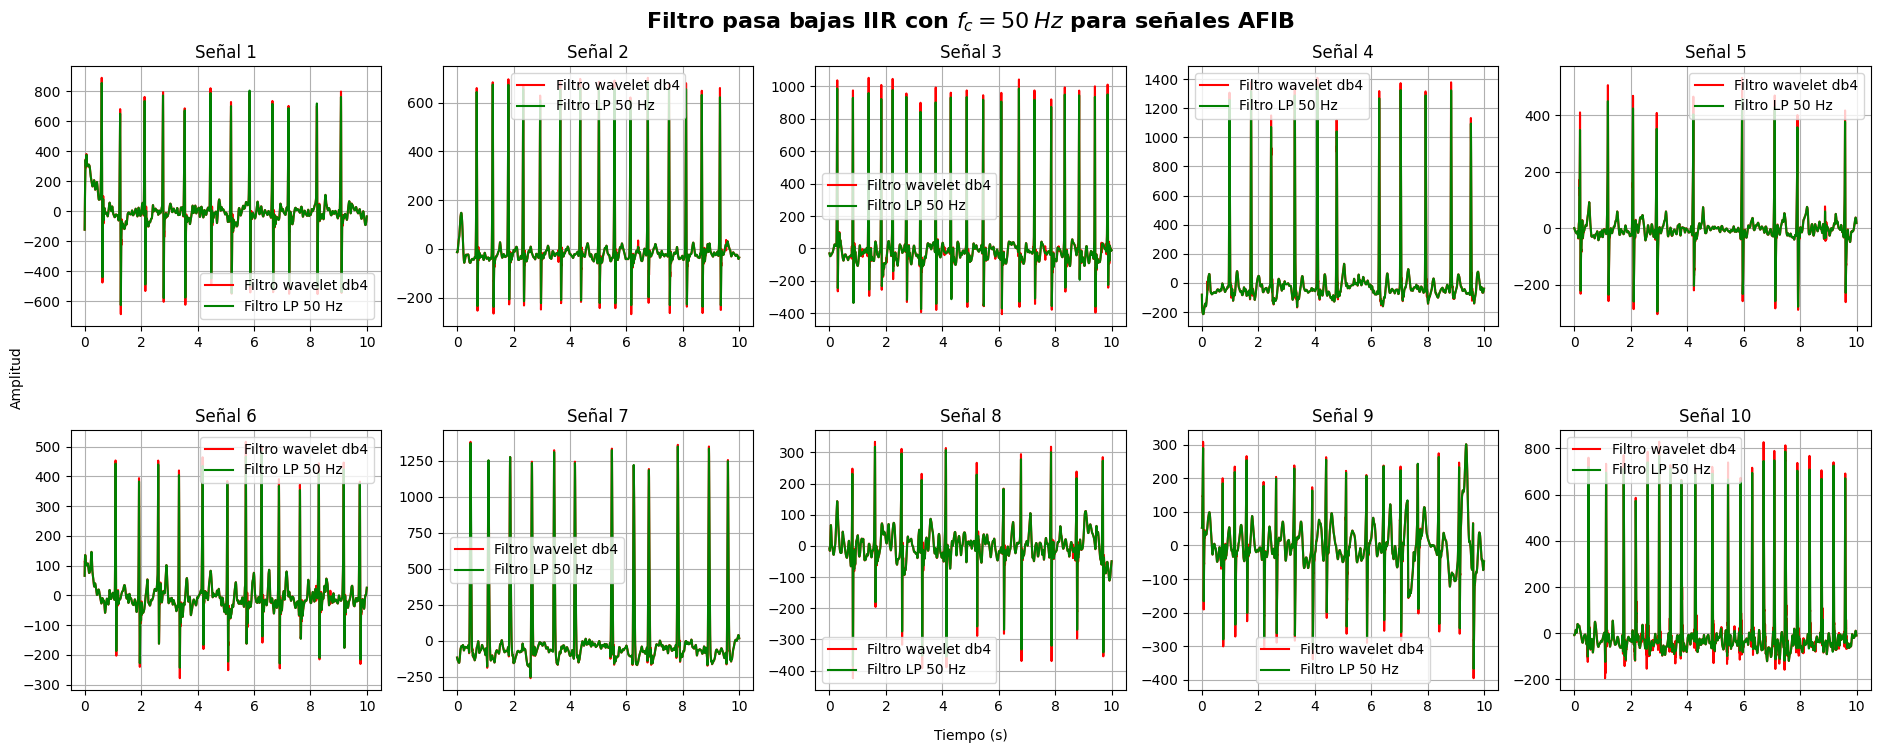

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Filtro pasa bajas IIR con $f_c=50 \: Hz$ para señales AFIB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_AFIB[:10]):
  signal_df = pd.read_csv(archivo, header=None, names=['II'])
  signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
  sig = signal_df['II'].values[1:]
  filtered_signal = highpass_IIR(sig)
  db4_signal = filter_ecg_wavelet(filtered_signal[0], level=4)
  filtered_signal = lowpass_IIR(db4_signal)
  n = np.arange(0, len(filtered_signal[0])/fs, 1/fs)

  ax = axs[i // 5, i % 5]
  if i == 7:
    ax.set_xlabel('Tiempo (s)')
    ax.xaxis.set_label_coords(0.5, -0.15)
  if i == 0:
    ax.set_ylabel('Amplitud')
    ax.yaxis.set_label_coords(-0.15, -0.2)
  ax.set(title=f'Señal {i + 1}')
  ax.plot(n, db4_signal, label='Filtro wavelet db4', color='red')
  ax.plot(n, filtered_signal[0], label='Filtro LP 50 Hz', color='green')
  ax.legend()
  ax.grid()
plt.show()

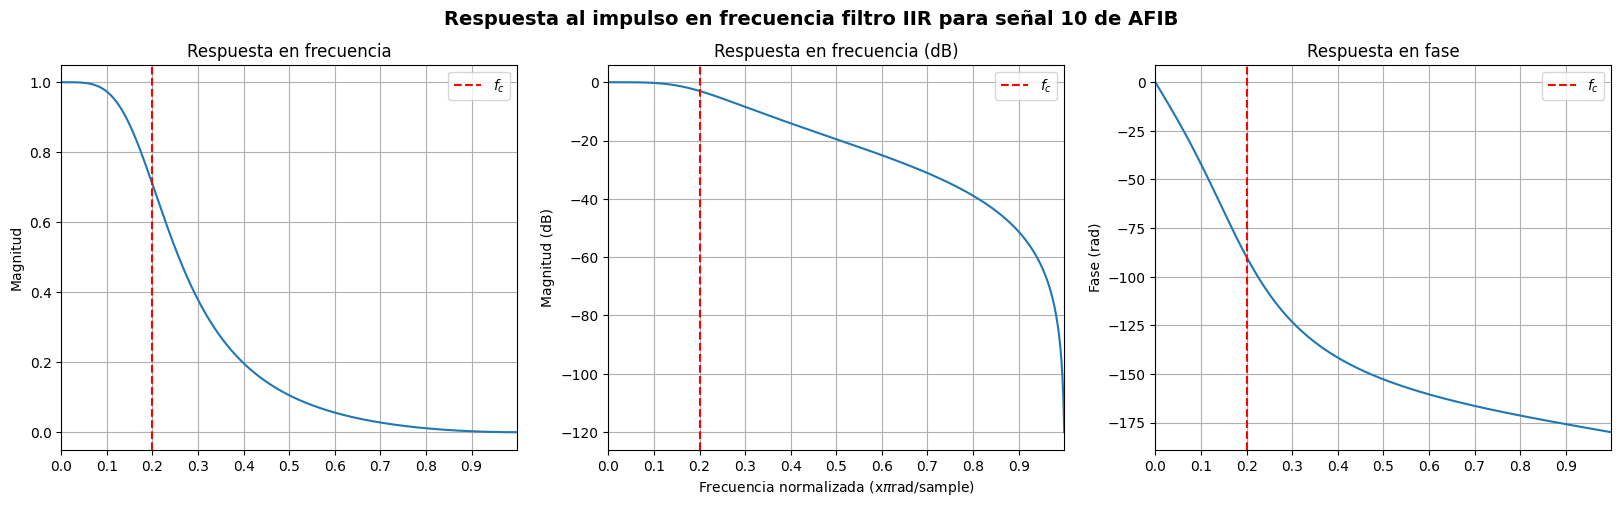

In [ ]:
mfreqz(filtered_signal[1], filtered_signal[2], i+1, filtered_signal[3], 'AFIB')

###<b>Flujo 2</b>

Para el flujo 2 se realiza primero un detrend de las señales seleccionadas y se aplica el filtro wavelet modificado diseñado en el numeral 3.

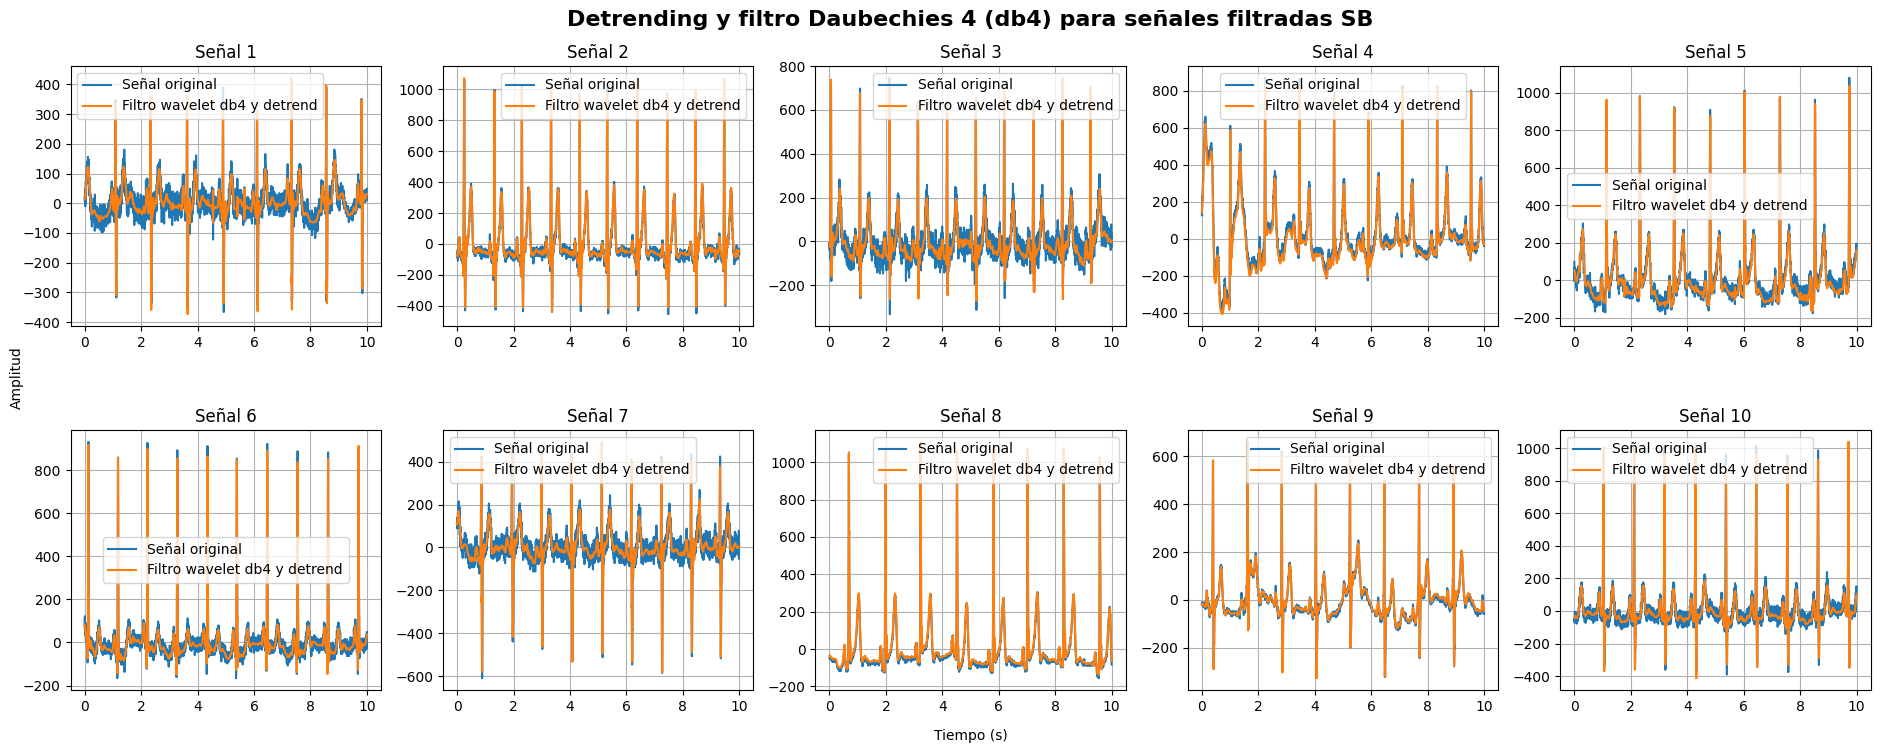

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Detrending y filtro Daubechies 4 (db4) para señales filtradas SB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_SB[:10]):
  signal_df = pd.read_csv(archivo, header=None, names=['II'])
  signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
  sig = signal_df['II'].values[1:]
  detrended_signal = signal.detrend(sig)
  db4_signal = filter_ecg_wavelet(detrended_signal, level=4)
  n = np.arange(0, len(db4_signal)/fs, 1/fs)

  ax = axs[i // 5, i % 5]
  if i == 7:
    ax.set_xlabel('Tiempo (s)')
    ax.xaxis.set_label_coords(0.5, -0.15)
  if i == 0:
    ax.set_ylabel('Amplitud')
    ax.yaxis.set_label_coords(-0.15, -0.2)
  ax.set(title=f'Señal {i + 1}')
  ax.plot(n, sig, label='Señal original')
  ax.plot(n, db4_signal, label='Filtro wavelet db4 y detrend')
  ax.legend()
  ax.grid()
plt.show()

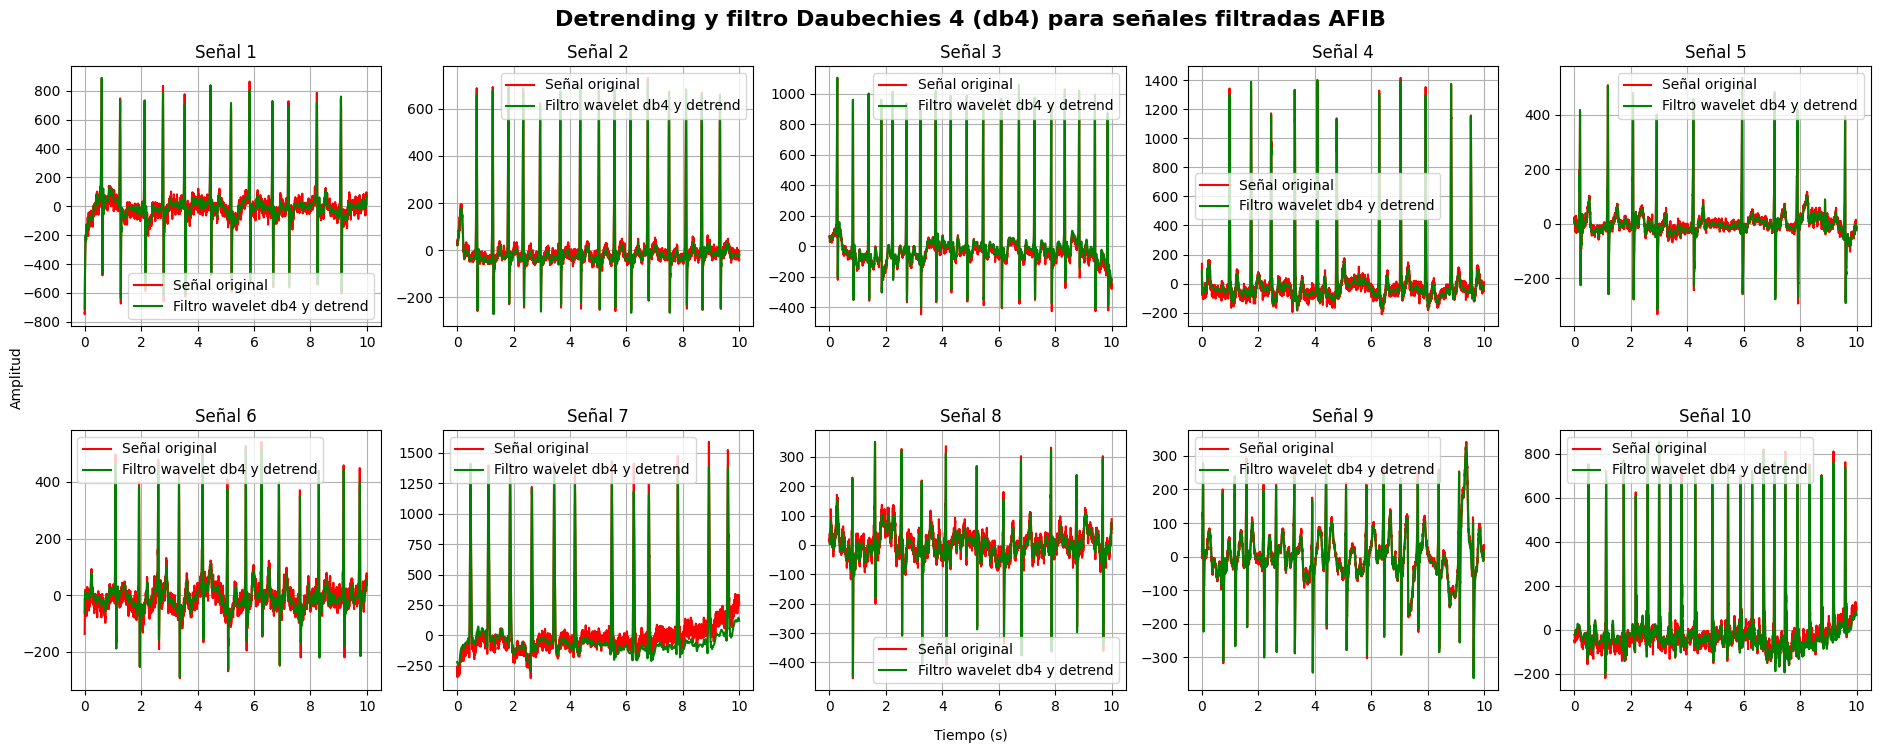

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Detrending y filtro Daubechies 4 (db4) para señales filtradas AFIB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_AFIB[:10]):
  signal_df = pd.read_csv(archivo, header=None, names=['II'])
  signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
  sig = signal_df['II'].values[1:]
  detrended_signal = signal.detrend(sig)
  db4_signal = filter_ecg_wavelet(detrended_signal, level=4)
  n = np.arange(0, len(db4_signal)/fs, 1/fs)

  ax = axs[i // 5, i % 5]
  if i == 7:
    ax.set_xlabel('Tiempo (s)')
    ax.xaxis.set_label_coords(0.5, -0.15)
  if i == 0:
    ax.set_ylabel('Amplitud')
    ax.yaxis.set_label_coords(-0.15, -0.2)
  ax.set(title=f'Señal {i + 1}')
  ax.plot(n, sig, label='Señal original', color='red')
  ax.plot(n, db4_signal, label='Filtro wavelet db4 y detrend', color='green')
  ax.legend()
  ax.grid()
plt.show()

Finalmente, se aplica el mismo filtro pasa bajas de 50 Hz diseñado para el flujo 1.

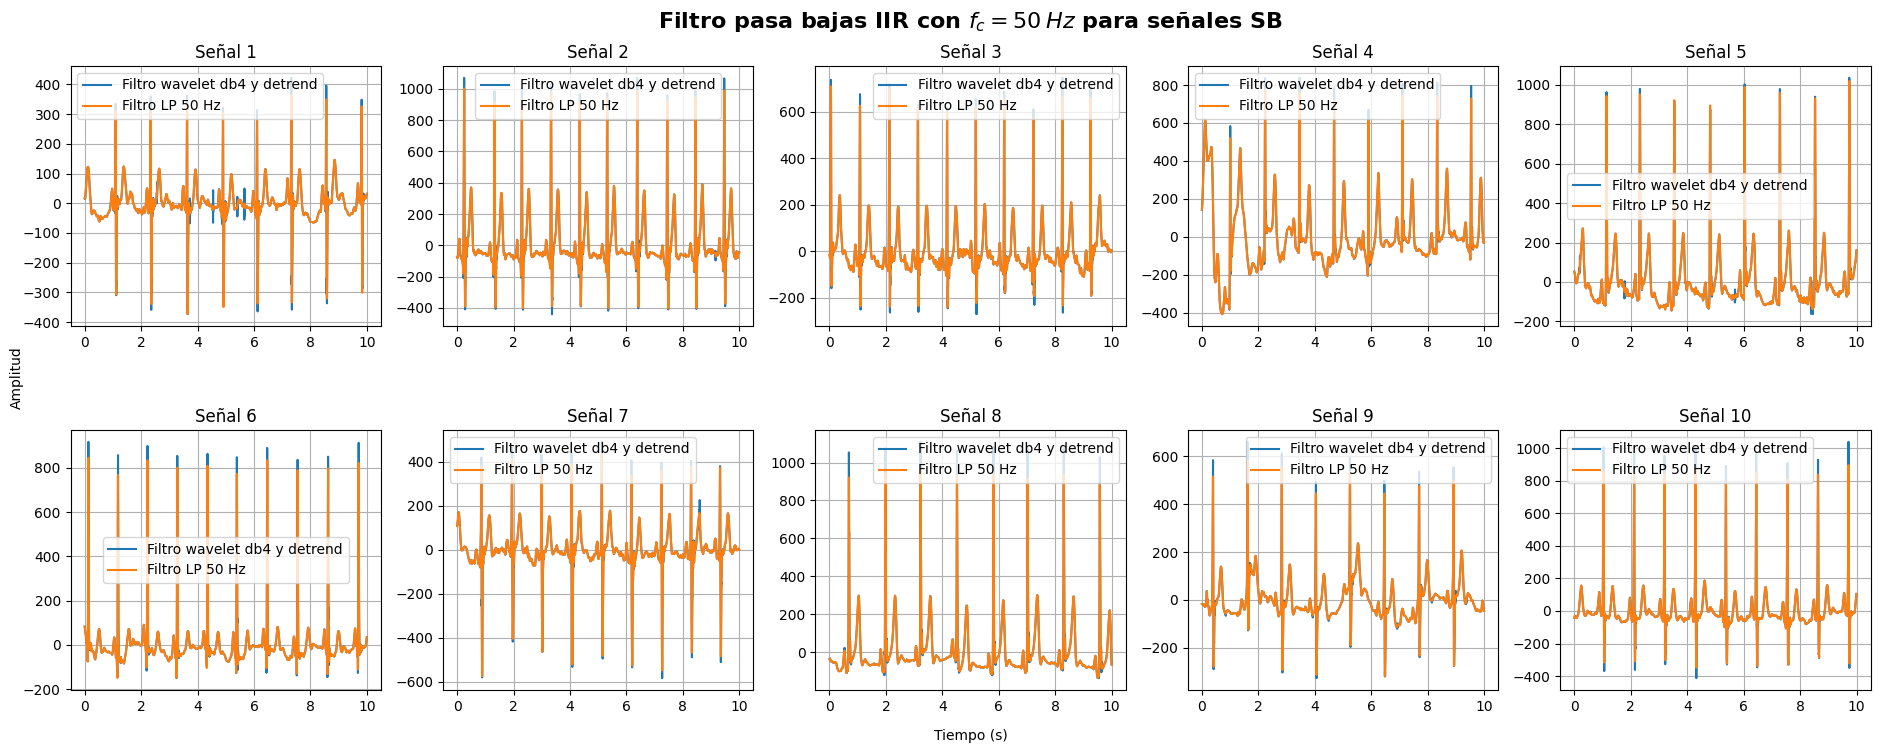

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Filtro pasa bajas IIR con $f_c=50 \: Hz$ para señales SB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_SB[:10]):
  signal_df = pd.read_csv(archivo, header=None, names=['II'])
  signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
  sig = signal_df['II'].values[1:]
  detrended_signal = signal.detrend(sig)
  db4_signal = filter_ecg_wavelet(detrended_signal, level=4)
  filtered_signal = lowpass_IIR(db4_signal)
  n = np.arange(0, len(filtered_signal[0])/fs, 1/fs)

  ax = axs[i // 5, i % 5]
  if i == 7:
    ax.set_xlabel('Tiempo (s)')
    ax.xaxis.set_label_coords(0.5, -0.15)
  if i == 0:
    ax.set_ylabel('Amplitud')
    ax.yaxis.set_label_coords(-0.15, -0.2)
  ax.set(title=f'Señal {i + 1}')
  ax.plot(n, db4_signal, label='Filtro wavelet db4 y detrend')
  ax.plot(n, filtered_signal[0], label='Filtro LP 50 Hz')
  ax.legend()
  ax.grid()
plt.show()

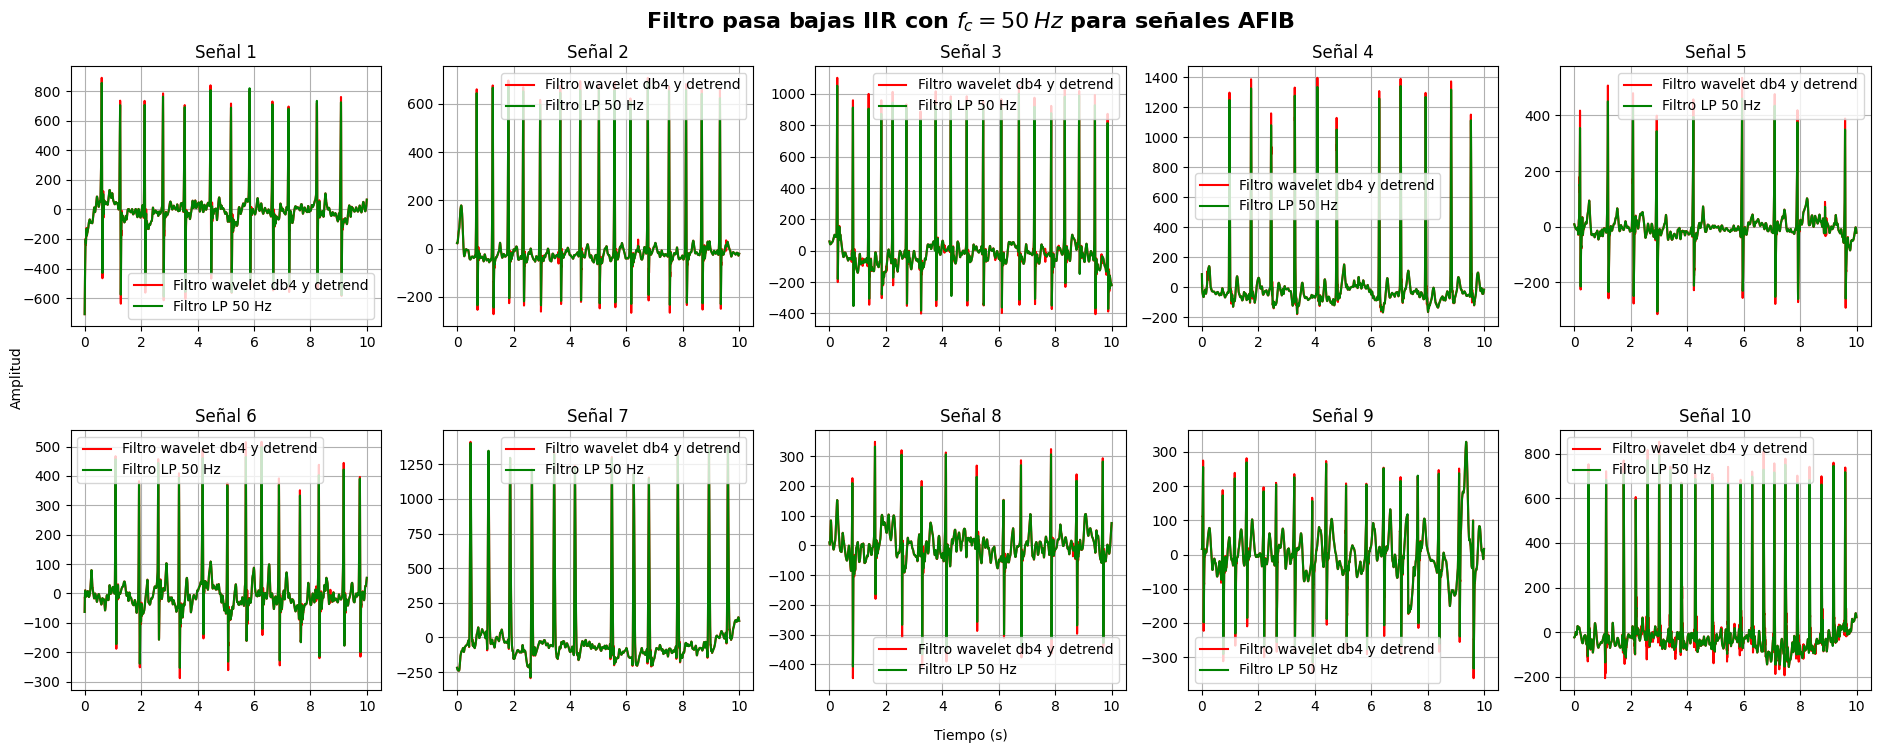

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Filtro pasa bajas IIR con $f_c=50 \: Hz$ para señales AFIB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_AFIB[:10]):
  signal_df = pd.read_csv(archivo, header=None, names=['II'])
  signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
  sig = signal_df['II'].values[1:]
  detrended_signal = signal.detrend(sig)
  db4_signal = filter_ecg_wavelet(detrended_signal, level=4)
  filtered_signal = lowpass_IIR(db4_signal)
  n = np.arange(0, len(filtered_signal[0])/fs, 1/fs)

  ax = axs[i // 5, i % 5]
  if i == 7:
    ax.set_xlabel('Tiempo (s)')
    ax.xaxis.set_label_coords(0.5, -0.15)
  if i == 0:
    ax.set_ylabel('Amplitud')
    ax.yaxis.set_label_coords(-0.15, -0.2)
  ax.set(title=f'Señal {i + 1}')
  ax.plot(n, db4_signal, label='Filtro wavelet db4 y detrend', color='red')
  ax.plot(n, filtered_signal[0], label='Filtro LP 50 Hz', color='green')
  ax.legend()
  ax.grid()
plt.show()

###<b>Flujo 3</b>

Para el flujo 3 se aplican los mismo filtros pasa altas IIR y pasa bajas IIR del flujo 1.

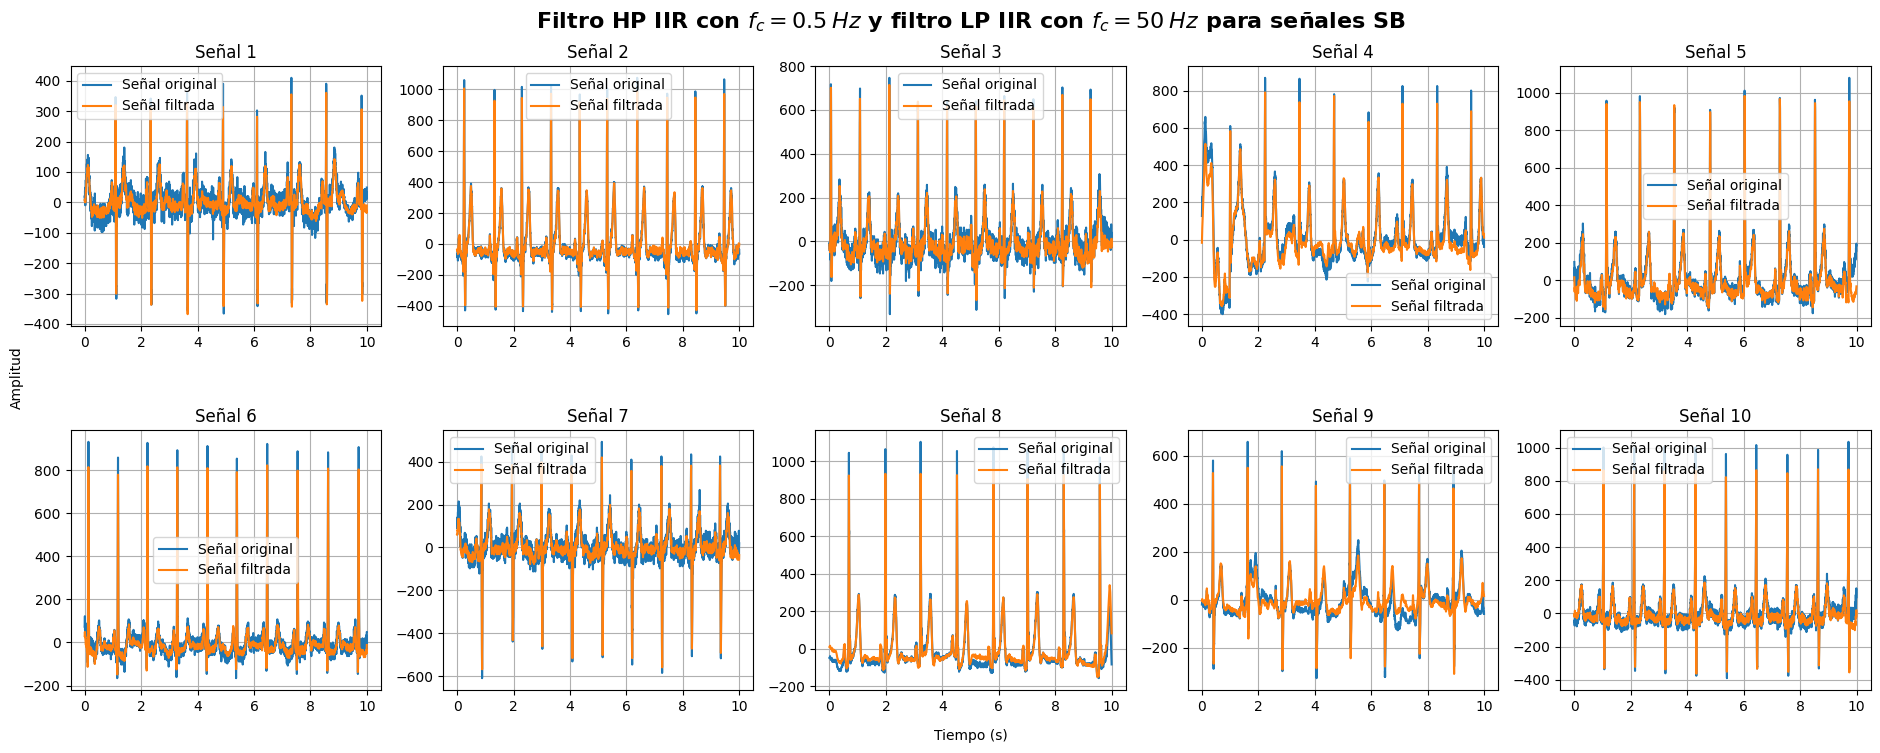

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Filtro HP IIR con $f_c=0.5 \: Hz$ y filtro LP IIR con $f_c=50 \: Hz$ para señales SB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_SB[:10]):
  signal_df = pd.read_csv(archivo, header=None, names=['II'])
  signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
  sig = signal_df['II'].values[1:]
  HP_signal = highpass_IIR(sig)
  LP_signal = lowpass_IIR(HP_signal[0])
  n = np.arange(0, len(LP_signal[0])/fs, 1/fs)

  ax = axs[i // 5, i % 5]
  if i == 7:
    ax.set_xlabel('Tiempo (s)')
    ax.xaxis.set_label_coords(0.5, -0.15)
  if i == 0:
    ax.set_ylabel('Amplitud')
    ax.yaxis.set_label_coords(-0.15, -0.2)
  ax.set(title=f'Señal {i + 1}')
  ax.plot(n, sig, label='Señal original')
  ax.plot(n, LP_signal[0], label='Señal filtrada')
  ax.legend()
  ax.grid()
plt.show()

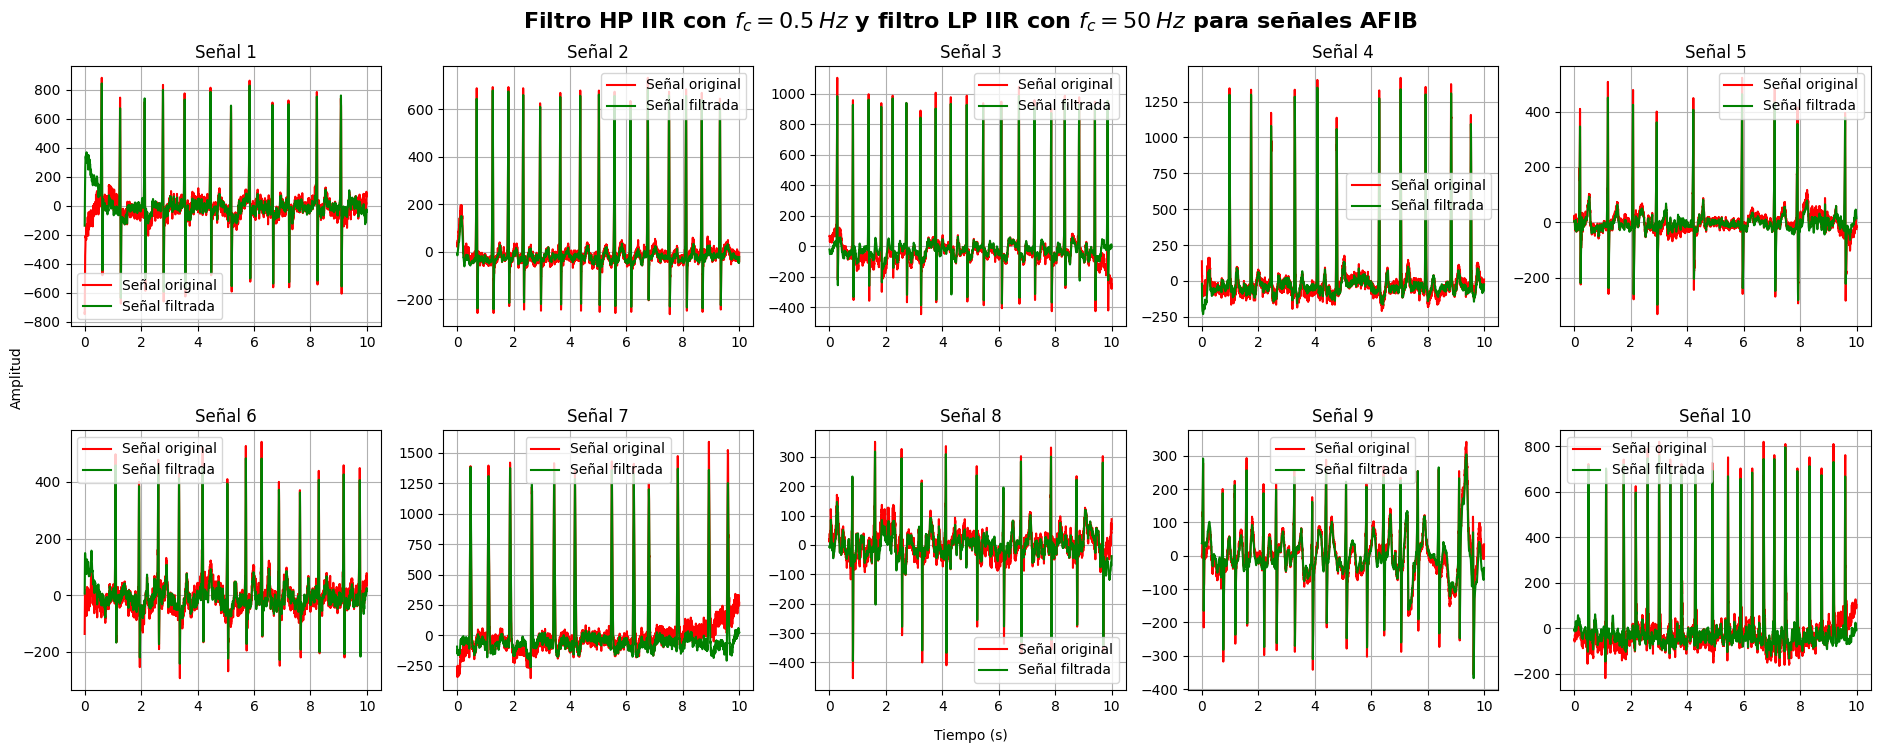

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Filtro HP IIR con $f_c=0.5 \: Hz$ y filtro LP IIR con $f_c=50 \: Hz$ para señales AFIB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_AFIB[:10]):
  signal_df = pd.read_csv(archivo, header=None, names=['II'])
  signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
  sig = signal_df['II'].values[1:]
  HP_signal = highpass_IIR(sig)
  LP_signal = lowpass_IIR(HP_signal[0])
  n = np.arange(0, len(LP_signal[0])/fs, 1/fs)

  ax = axs[i // 5, i % 5]
  if i == 7:
    ax.set_xlabel('Tiempo (s)')
    ax.xaxis.set_label_coords(0.5, -0.15)
  if i == 0:
    ax.set_ylabel('Amplitud')
    ax.yaxis.set_label_coords(-0.15, -0.2)
  ax.set(title=f'Señal {i + 1}')
  ax.plot(n, sig, label='Señal original', color='red')
  ax.plot(n, LP_signal[0], label='Señal filtrada', color='green')
  ax.legend()
  ax.grid()
plt.show()

###<h4>De los 3 flujos aplicados a las señales aleatorias de cada condición, se observan mejores resultados de conservamiento de fase y linea de base para los flujos 1 y 2. Para seleccionar el flujo para el procesamiento final de todas las señales, se puede comparar el espectro de frecuencias y periodograma de Welch de las señales resultantes para cada flujo.</h4>

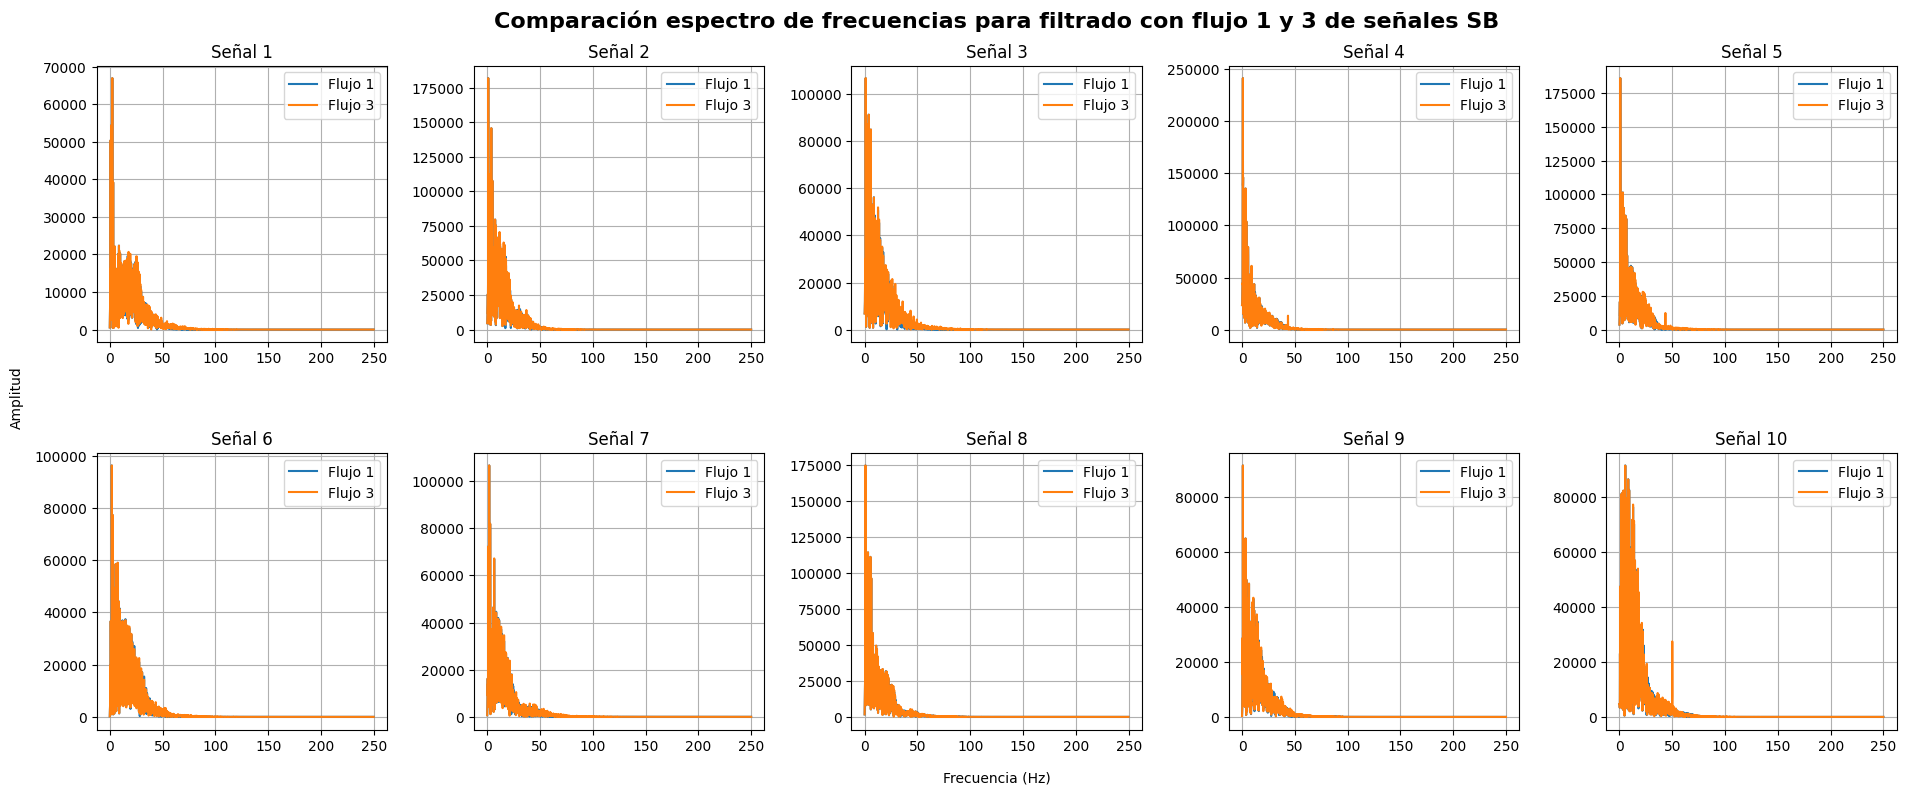

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.05, wspace=0.3, hspace=0.4)
fig.suptitle('Comparación espectro de frecuencias para filtrado con flujo 1 y 3 de señales SB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_SB[:10]):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
    sig = signal_df['II'].values[1:]

    #FLUJO 1
    hp_signal = highpass_IIR(sig)
    db4_signal = filter_ecg_wavelet(hp_signal[0], level=4)
    f1_signal = lowpass_IIR(db4_signal)
    freqs_f1 = np.fft.fftfreq(len(f1_signal[0]), 1/fs)
    fft_vals_f1 = np.abs(np.fft.fft(f1_signal[0]))

    #FLUJO 3
    HP_signal = highpass_IIR(sig)
    f3_signal = lowpass_IIR(HP_signal[0])
    freqs_f3 = np.fft.fftfreq(len(f3_signal[0]), 1/fs)
    fft_vals_f3 = np.abs(np.fft.fft(f3_signal[0]))

    n = np.arange(0, len(f1_signal[0])/fs, 1/fs)

    ax_freq = axs[i // 5, i % 5]
    if i == 7:
      ax_freq.set_xlabel('Frecuencia (Hz)')
      ax_freq.xaxis.set_label_coords(0.5, -0.15)
    if i == 0:
      ax_freq.set_ylabel('Amplitud')
      ax_freq.yaxis.set_label_coords(-0.25, -0.2)
    ax_freq.set(title=f'Señal {i + 1}')
    ax_freq.plot(freqs_f1[:len(freqs_f1)//2], fft_vals_f1[:len(freqs_f1)//2], label='Flujo 1')
    ax_freq.plot(freqs_f3[:len(freqs_f3)//2], fft_vals_f3[:len(freqs_f3)//2], label='Flujo 3')
    ax_freq.legend()
    ax_freq.grid()
plt.show()

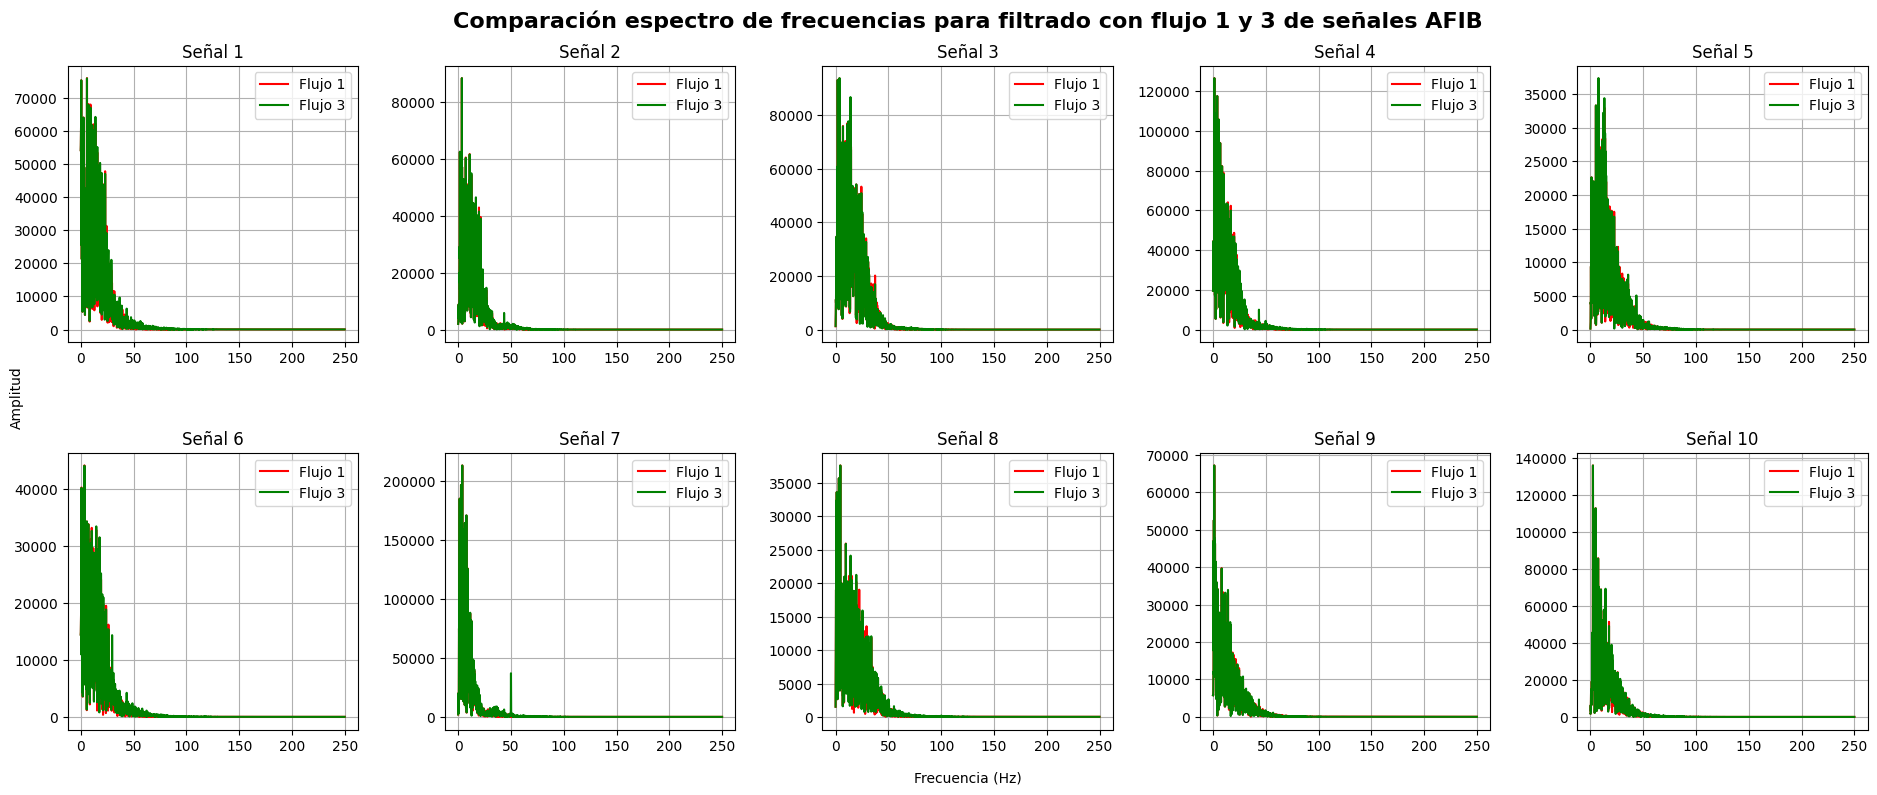

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.05, wspace=0.3, hspace=0.4)
fig.suptitle('Comparación espectro de frecuencias para filtrado con flujo 1 y 3 de señales AFIB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_AFIB[:10]):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
    sig = signal_df['II'].values[1:]

    #FLUJO 1
    hp_signal = highpass_IIR(sig)
    db4_signal = filter_ecg_wavelet(hp_signal[0], level=4)
    f1_signal = lowpass_IIR(db4_signal)
    freqs_f1 = np.fft.fftfreq(len(f1_signal[0]), 1/fs)
    fft_vals_f1 = np.abs(np.fft.fft(f1_signal[0]))

    #FLUJO 3
    HP_signal = highpass_IIR(sig)
    f3_signal = lowpass_IIR(HP_signal[0])
    freqs_f3 = np.fft.fftfreq(len(f3_signal[0]), 1/fs)
    fft_vals_f3 = np.abs(np.fft.fft(f3_signal[0]))

    n = np.arange(0, len(f1_signal[0])/fs, 1/fs)

    ax_freq = axs[i // 5, i % 5]
    if i == 7:
      ax_freq.set_xlabel('Frecuencia (Hz)')
      ax_freq.xaxis.set_label_coords(0.5, -0.15)
    if i == 0:
      ax_freq.set_ylabel('Amplitud')
      ax_freq.yaxis.set_label_coords(-0.15, -0.2)
    ax_freq.set(title=f'Señal {i + 1}')
    ax_freq.plot(freqs_f1[:len(freqs_f1)//2], fft_vals_f1[:len(freqs_f1)//2], label='Flujo 1', color='red')
    ax_freq.plot(freqs_f3[:len(freqs_f3)//2], fft_vals_f3[:len(freqs_f3)//2], label='Flujo 3', color='green')
    ax_freq.legend()
    ax_freq.grid()
plt.show()

Se observa que con el flujo 3 se conservaron componentes de frecuencia relativamente altos cercanos a 50 Hz, los cuales no hacen parte de las componentes características de las señales ECG. Por lo anterior, se descarta el flujo 1 para el procesamiento posterior.

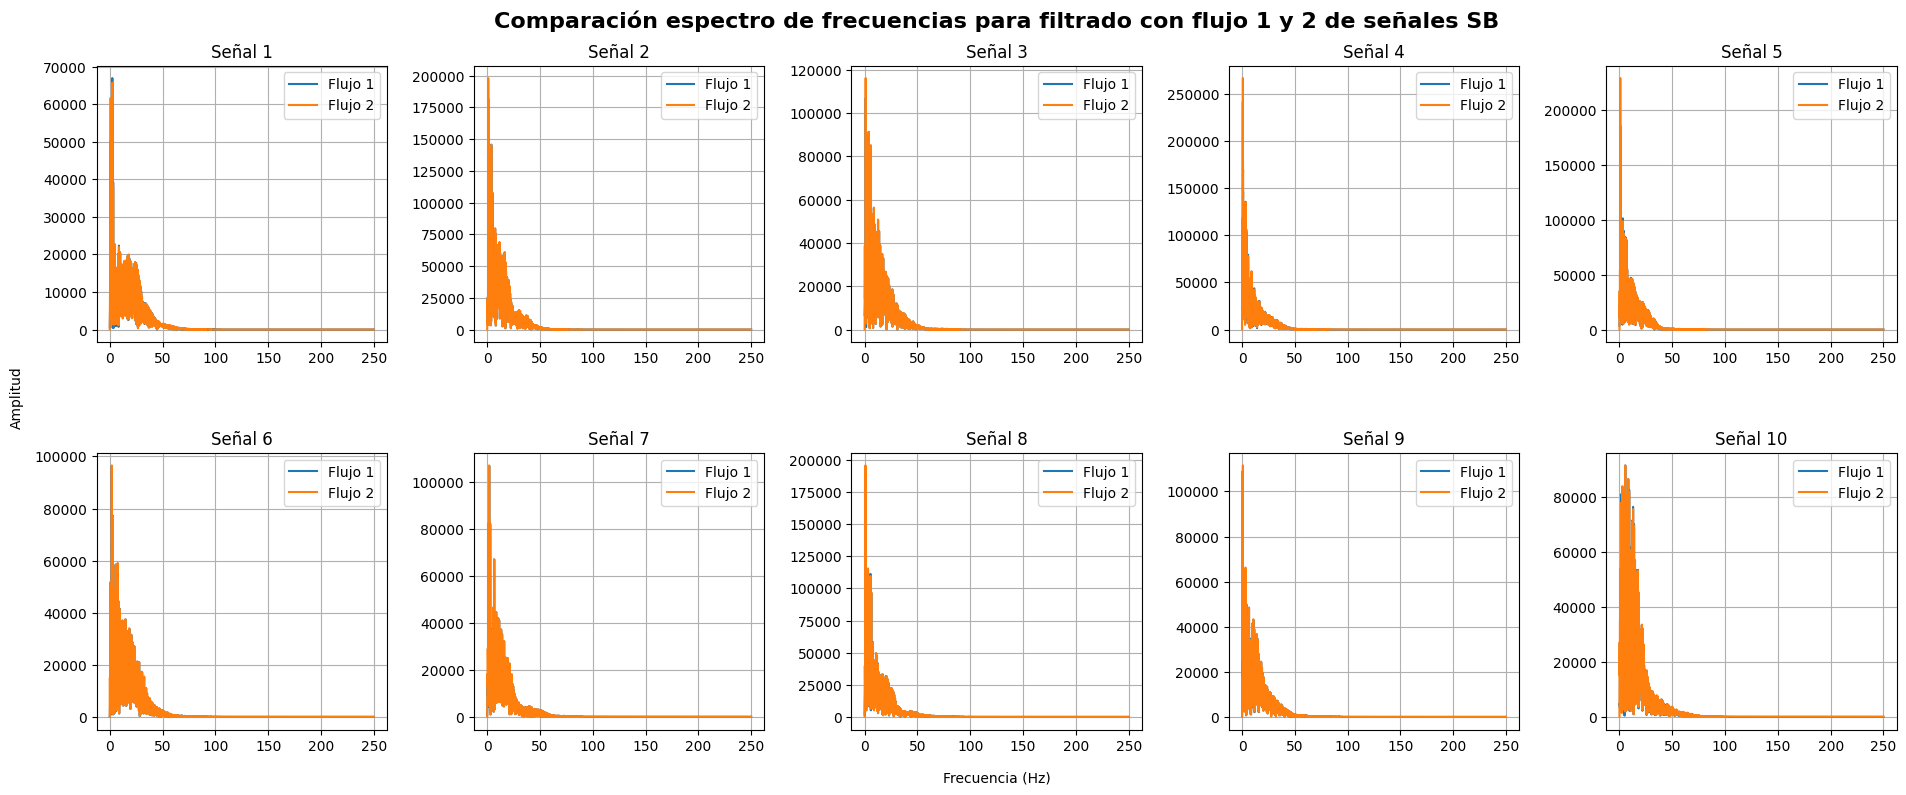

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.05, wspace=0.3, hspace=0.4)
fig.suptitle('Comparación espectro de frecuencias para filtrado con flujo 1 y 2 de señales SB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_SB[:10]):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
    sig = signal_df['II'].values[1:]

    #FLUJO 1
    hp_signal = highpass_IIR(sig)
    db4_signal = filter_ecg_wavelet(hp_signal[0], level=4)
    f1_signal = lowpass_IIR(db4_signal)
    freqs_f1 = np.fft.fftfreq(len(f1_signal[0]), 1/fs)
    fft_vals_f1 = np.abs(np.fft.fft(f1_signal[0]))

    #FLUJO 2
    detrended_signal = signal.detrend(sig)
    db4_signal = filter_ecg_wavelet(detrended_signal, level=4)
    f2_signal = lowpass_IIR(db4_signal)
    freqs_f2 = np.fft.fftfreq(len(f2_signal[0]), 1/fs)
    fft_vals_f2 = np.abs(np.fft.fft(f2_signal[0]))

    n = np.arange(0, len(f1_signal[0])/fs, 1/fs)

    ax_freq = axs[i // 5, i % 5]
    if i == 7:
      ax_freq.set_xlabel('Frecuencia (Hz)')
      ax_freq.xaxis.set_label_coords(0.5, -0.15)
    if i == 0:
      ax_freq.set_ylabel('Amplitud')
      ax_freq.yaxis.set_label_coords(-0.25, -0.2)
    ax_freq.set(title=f'Señal {i + 1}')
    ax_freq.plot(freqs_f1[:len(freqs_f1)//2], fft_vals_f1[:len(freqs_f1)//2], label='Flujo 1')
    ax_freq.plot(freqs_f2[:len(freqs_f2)//2], fft_vals_f2[:len(freqs_f2)//2], label='Flujo 2')
    ax_freq.legend()
    ax_freq.grid()
plt.show()

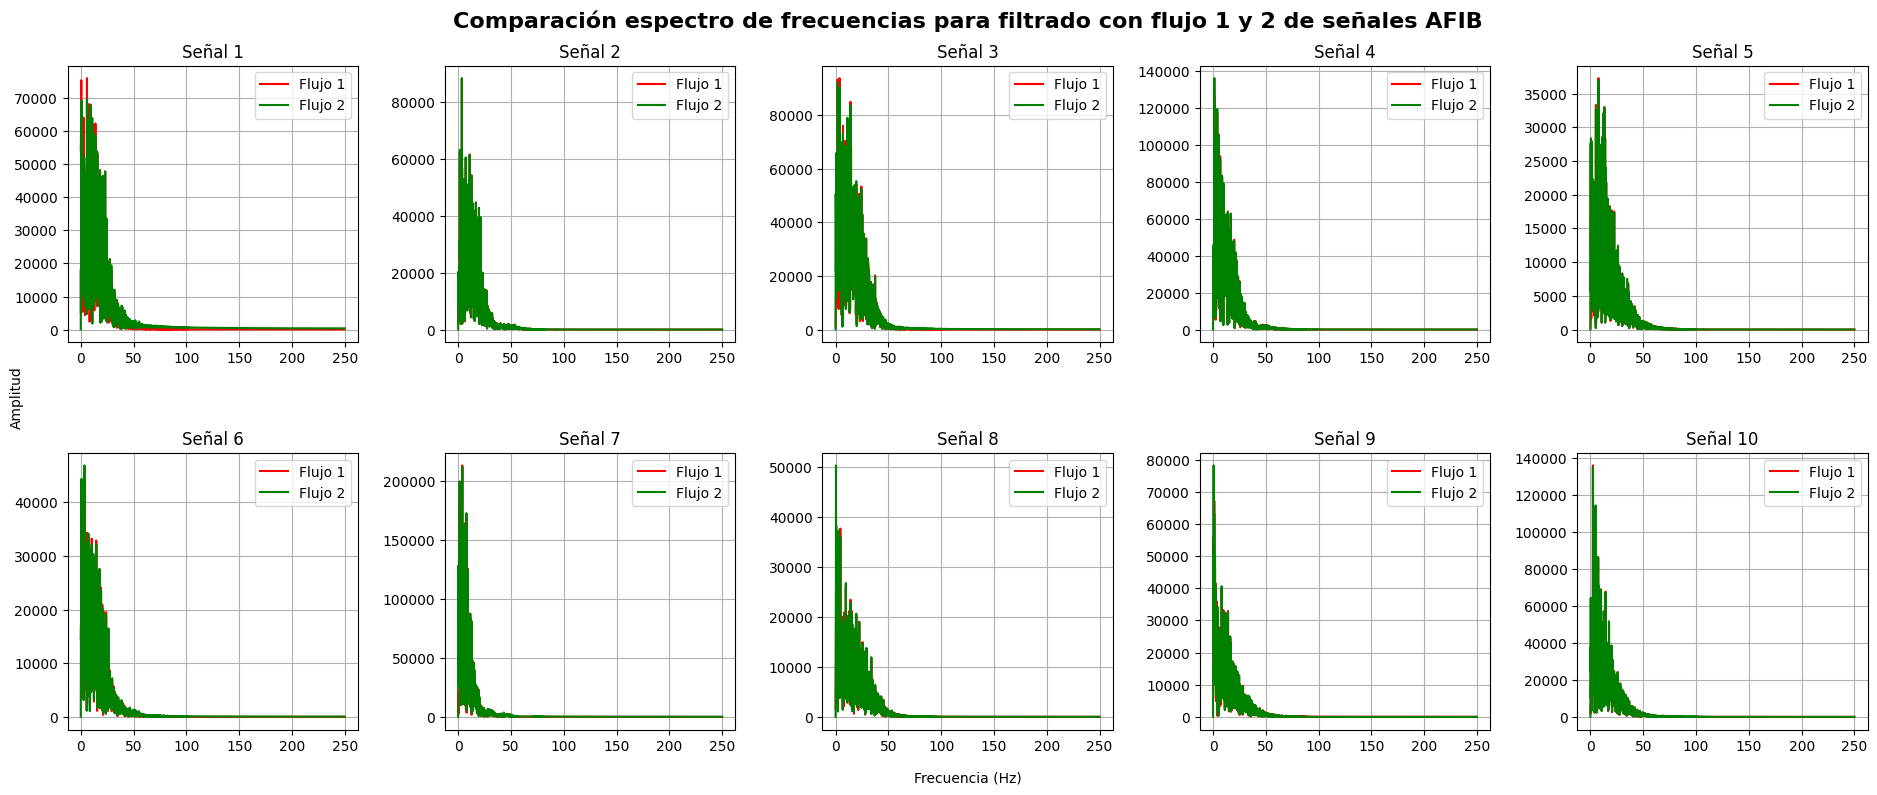

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.05, wspace=0.3, hspace=0.4)
fig.suptitle('Comparación espectro de frecuencias para filtrado con flujo 1 y 2 de señales AFIB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_AFIB[:10]):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
    sig = signal_df['II'].values[1:]

    #FLUJO 1
    hp_signal = highpass_IIR(sig)
    db4_signal = filter_ecg_wavelet(hp_signal[0], level=4)
    f1_signal = lowpass_IIR(db4_signal)
    freqs_f1 = np.fft.fftfreq(len(f1_signal[0]), 1/fs)
    fft_vals_f1 = np.abs(np.fft.fft(f1_signal[0]))

    #FLUJO 2
    detrended_signal = signal.detrend(sig)
    db4_signal = filter_ecg_wavelet(detrended_signal, level=4)
    f2_signal = lowpass_IIR(db4_signal)
    freqs_f2 = np.fft.fftfreq(len(f2_signal[0]), 1/fs)
    fft_vals_f2 = np.abs(np.fft.fft(f2_signal[0]))

    n = np.arange(0, len(f1_signal[0])/fs, 1/fs)

    ax_freq = axs[i // 5, i % 5]
    if i == 7:
      ax_freq.set_xlabel('Frecuencia (Hz)')
      ax_freq.xaxis.set_label_coords(0.5, -0.15)
    if i == 0:
      ax_freq.set_ylabel('Amplitud')
      ax_freq.yaxis.set_label_coords(-0.15, -0.2)
    ax_freq.set(title=f'Señal {i + 1}')
    ax_freq.plot(freqs_f1[:len(freqs_f1)//2], fft_vals_f1[:len(freqs_f1)//2], label='Flujo 1', color='red')
    ax_freq.plot(freqs_f2[:len(freqs_f2)//2], fft_vals_f2[:len(freqs_f2)//2], label='Flujo 2', color='green')
    ax_freq.legend()
    ax_freq.grid()
plt.show()

Al comparar los espectros de las señales filtradas del flujo 1 y 2 no se observan diferencias significativas en cuanto a las frecuencias conservadas de la señal, por lo que se compara el periodograma de Welch y se determina una tasa de componentes significativos de la señal por ruido o 'Signal-to-Noise-Ratio' (SNR). Esta última consiste en restar la señal original y la filtrada para determinar el ruido, y posteriormente se calcula una relación entre la potencia de la señal cruda y la potencia del componente de ruido <b>[11]</b>. Valores mayores de SNR indican que se conservaron más detalles de la señal ECG luego del filtrado, que pueden representar características importantes o ruido si no se aplicó un procesamiento adecuado.

In [ ]:
def calculate_snr(original_signal, filtered_signal):
    noise = original_signal - filtered_signal
    signal_power = np.mean(original_signal ** 2)
    noise_power = np.mean(noise ** 2)
    snr = 10 * np.log10(signal_power / noise_power)

    return snr

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.05, wspace=0.3, hspace=0.4)
fig.suptitle('Comparación PSD para filtrado con flujo 1 y 2 de señales SB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_SB[:10]):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
    sig = signal_df['II'].values[1:]

    #FLUJO 1
    hp_signal = highpass_IIR(sig)
    db4_signal = filter_ecg_wavelet(hp_signal[0], level=4)
    f1_signal = lowpass_IIR(db4_signal)
    f_welch_f1, Pxx_welch_f1 = signal.welch(f1_signal[0], fs, nperseg=1024)
    snr_f1 = calculate_snr(sig, f1_signal[0])

    #FLUJO 2
    detrended_signal = signal.detrend(sig)
    db4_signal = filter_ecg_wavelet(detrended_signal, level=4)
    f2_signal = lowpass_IIR(db4_signal)
    f_welch_f2, Pxx_welch_f2 = signal.welch(f2_signal[0], fs, nperseg=1024)
    snr_f2 = calculate_snr(sig, f2_signal[0])

    n = np.arange(0, len(f1_signal[0])/fs, 1/fs)

    ax_freq = axs[i // 5, i % 5]
    if i == 7:
      ax_freq.set_xlabel('Frecuencia (Hz)')
      ax_freq.xaxis.set_label_coords(0.5, -0.15)
    if i == 0:
      ax_freq.set_ylabel('PSD (V²/Hz)')
      ax_freq.yaxis.set_label_coords(-0.15, -0.2)
    ax_freq.set(title=f'Señal {i + 1}', xlim=(-5, 50), xticks=np.arange(0, 51, 5))
    ax_freq.plot(f_welch_f2, Pxx_welch_f2, label=f'Flujo 2 - SNR: {snr_f2:.3f}')
    ax_freq.plot(f_welch_f1, Pxx_welch_f1, label=f'Flujo 1 - SNR: {snr_f1:.3f}')
    ax_freq.axvline(0.5, color='r', linestyle='--', label=f'F= {0.5} Hz')
    ax_freq.legend()
    ax_freq.grid()
plt.show()

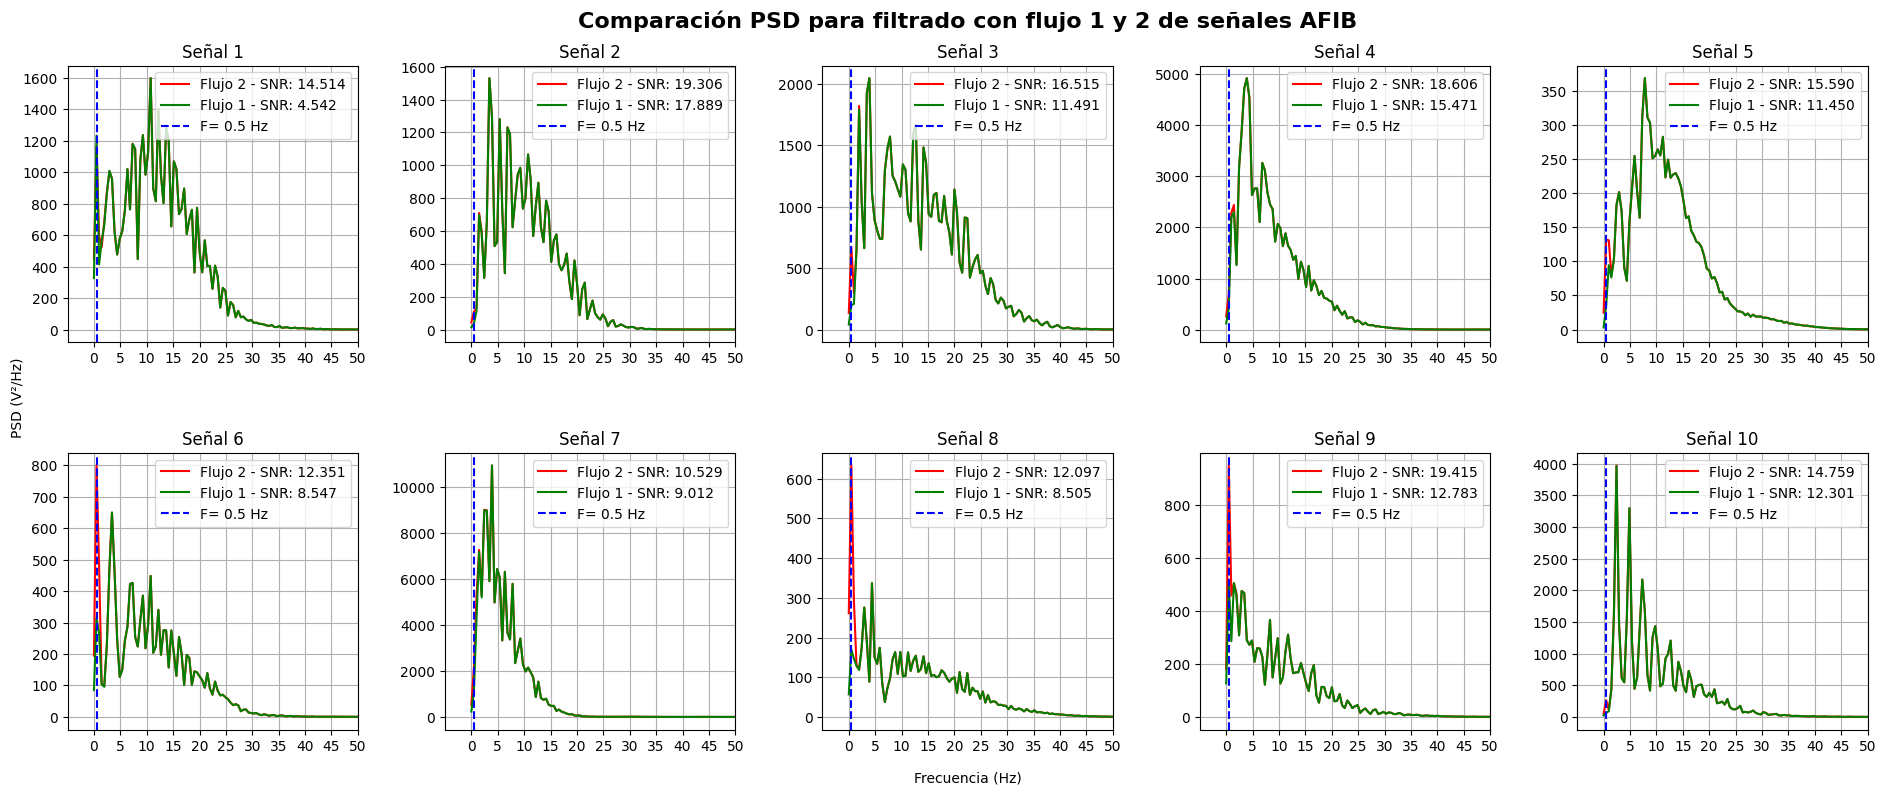

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.05, wspace=0.3, hspace=0.4)
fig.suptitle('Comparación PSD para filtrado con flujo 1 y 2 de señales AFIB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_AFIB[:10]):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
    sig = signal_df['II'].values[1:]

    #FLUJO 1
    hp_signal = highpass_IIR(sig)
    db4_signal = filter_ecg_wavelet(hp_signal[0], level=4)
    f1_signal = lowpass_IIR(db4_signal)
    f_welch_f1, Pxx_welch_f1 = signal.welch(f1_signal[0], fs, nperseg=1024)
    snr_f1 = calculate_snr(sig, f1_signal[0])

    #FLUJO 2
    detrended_signal = signal.detrend(sig)
    db4_signal = filter_ecg_wavelet(detrended_signal, level=4)
    f2_signal = lowpass_IIR(db4_signal)
    f_welch_f2, Pxx_welch_f2 = signal.welch(f2_signal[0], fs, nperseg=1024)
    snr_f2 = calculate_snr(sig, f2_signal[0])

    n = np.arange(0, len(f1_signal[0])/fs, 1/fs)

    ax_freq = axs[i // 5, i % 5]
    if i == 7:
      ax_freq.set_xlabel('Frecuencia (Hz)')
      ax_freq.xaxis.set_label_coords(0.5, -0.15)
    if i == 0:
      ax_freq.set_ylabel('PSD (V²/Hz)')
      ax_freq.yaxis.set_label_coords(-0.15, -0.2)
    ax_freq.set(title=f'Señal {i + 1}', xlim=(-5, 50), xticks=np.arange(0, 51, 5))
    ax_freq.plot(f_welch_f2, Pxx_welch_f2, label=f'Flujo 2 - SNR: {snr_f2:.3f}', color='red')
    ax_freq.plot(f_welch_f1, Pxx_welch_f1, label=f'Flujo 1 - SNR: {snr_f1:.3f}', color='green')
    ax_freq.axvline(0.5, color='b', linestyle='--', label=f'F= {0.5} Hz')
    ax_freq.legend()
    ax_freq.grid()
plt.show()

De la comparación de los flujos 1 y 2, se observa en general que el primer flujo presenta densidades de potencia menores en frecuencias cercanas a 0 Hz en comparación con el Flujo 2, lo que puede indicar que en este último se conservan algunas componentes de ruido de la linea de base de la señal. A pesar de que se obtienen valores de SNR más altos para el Flujo 2, es posible que frecuencias correspondientes a ruido por debajo de 0.5 Hz se estén conservando y no sean representativas de la señal ECG. Por otro lado, como en el Flujo 1 se aplicó inicialmente un filtro pasa altas con frecuencia de corte de 0.5 hz, se garantiza que se eliminaron las componentes de ruido de muy baja frecuencia y por esto se obtiene un SNR menor.

Por lo anterior, se opta por aplicar en el procesamiento final el <b>Flujo 1</b>, debido a que posee la mejor relación entre la conservación del detalle de la señal y el filtrado de componentes de ruido de baja y alta frecuencia.

##<h4><b>5. </b>Para cada señal extraer la frecuencia que contiene la máxima potencia usando Welch.</h4>

Se define la función para determinar la frecuencia de máxima potencia con el periodograma de Welch y la función de compresión para normalizar las señales.

In [ ]:
def compresion(signal):
  signal = np.array(signal)
  signal_without_dc = signal - np.mean(signal)
  x_min = np.min(signal_without_dc)
  x_max = np.max(signal_without_dc)
  s_tk = (signal_without_dc - x_min) / (x_max - x_min)

  return s_tk

In [ ]:
def frecuencia_max_potencia_welch(signal_data, fs):
    freqs, potencia = signal.welch(signal_data, fs, nperseg=1024)
    idx_max = np.argmax(potencia)
    freq_max = freqs[idx_max]
    pot_max = potencia[idx_max]

    return freq_max, pot_max, freqs, potencia

Inicialmente se determina solo la frecuencia de máxima potencia (fMP) de las 10 señales seleccionadas en el numeral anterior, tanto para el grupo con SB como el grupo con AFIB.

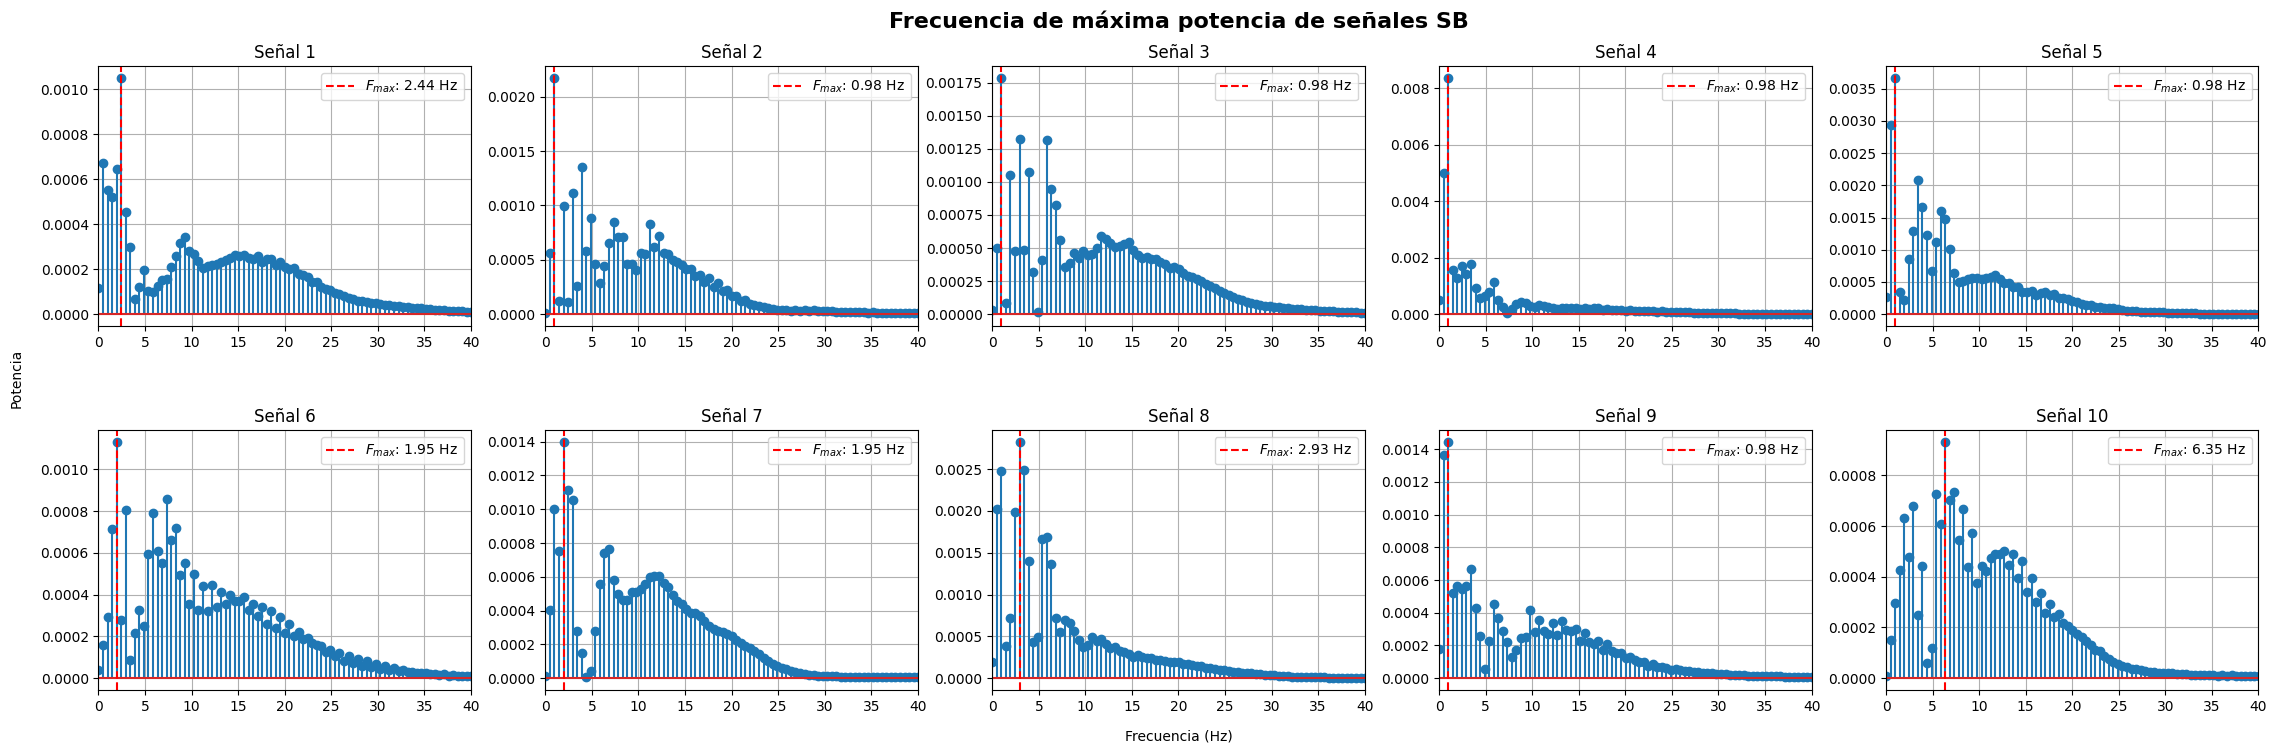

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(24, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Frecuencia de máxima potencia de señales SB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_SB[:10]):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
    hp_signal = highpass_IIR(signal_df['II'].values[1:])
    db4_signal = filter_ecg_wavelet(hp_signal[0], level=4)
    lp_signal = lowpass_IIR(db4_signal)
    sig = compresion(lp_signal[0])
    detrended_signal = signal.detrend(sig)

    freq_max, pot_max, freqs, potencia = frecuencia_max_potencia_welch(detrended_signal, fs)

    ax = axs[i // 5, i % 5]
    if i == 7:
      ax.set_xlabel('Frecuencia (Hz)')
      ax.xaxis.set_label_coords(0.5, -0.15)
    if i == 0:
      ax.set_ylabel('Potencia')
      ax.yaxis.set_label_coords(-0.2, -0.2)
    ax.set(title=f'Señal {i + 1}', xlim=(0, 40))
    ax.stem(freqs, potencia)
    ax.axvline(freq_max, color='r', linestyle='--', label=f'$F_{{max}}$: {freq_max:.2f} Hz')
    ax.grid()
    ax.legend()
plt.show()

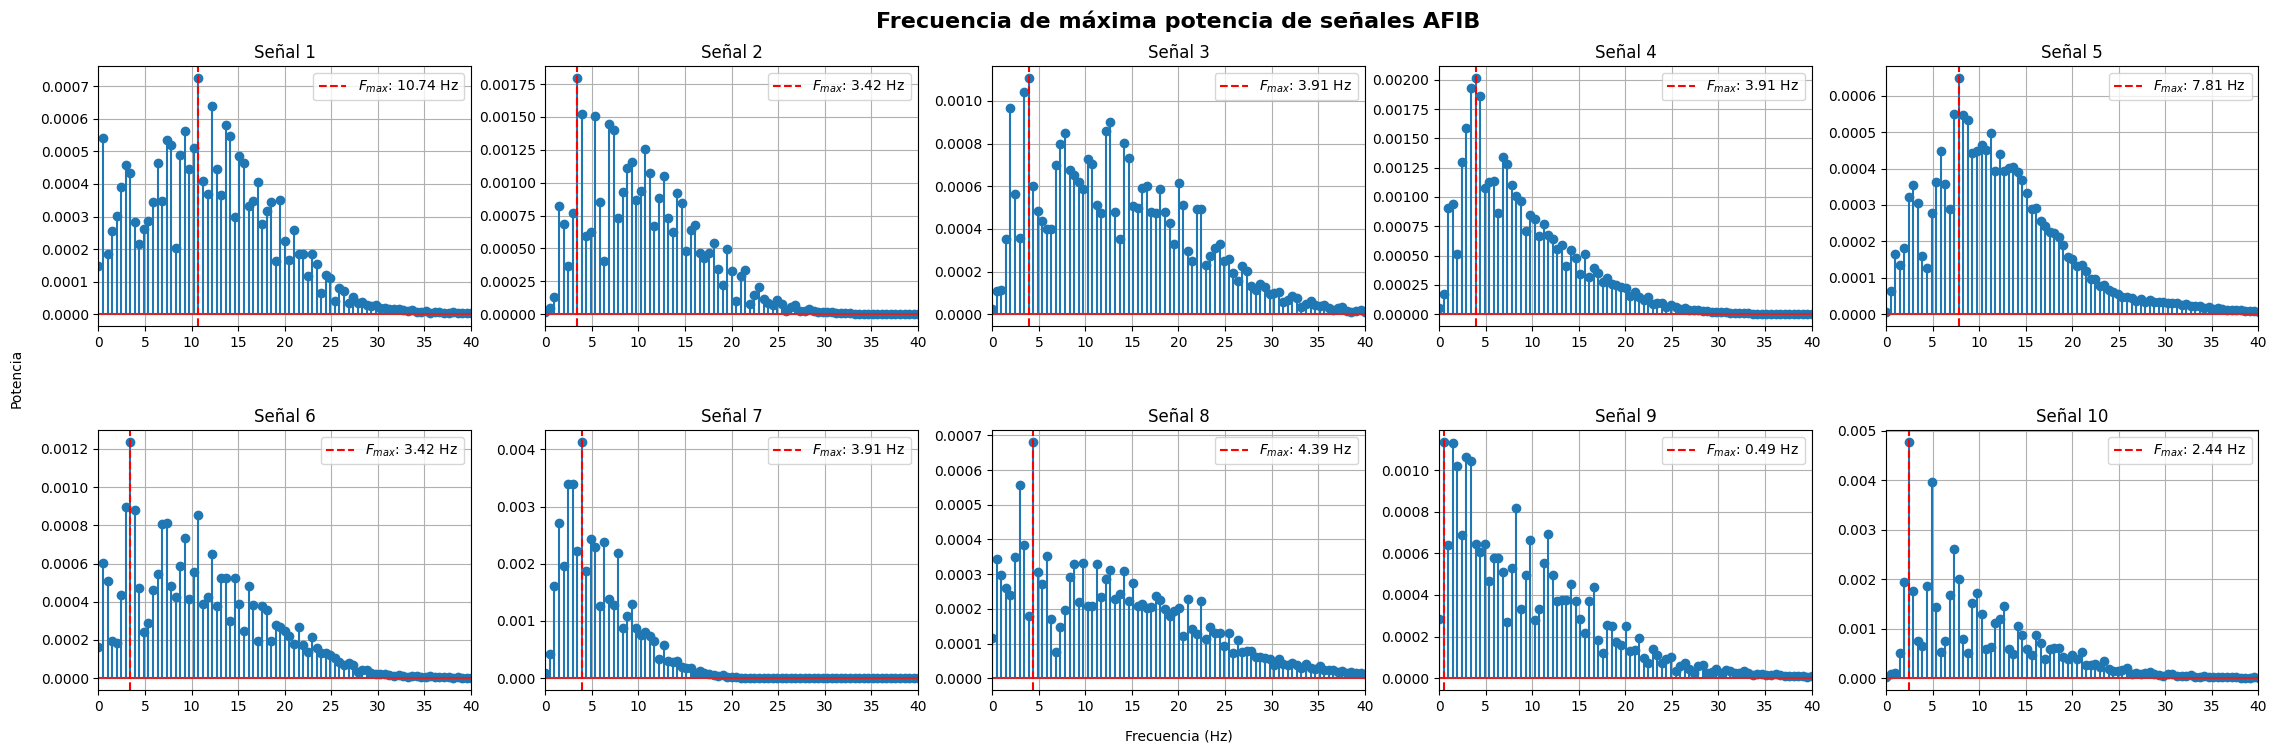

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(24, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Frecuencia de máxima potencia de señales AFIB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_AFIB[:10]):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
    hp_signal = highpass_IIR(signal_df['II'].values[1:])
    db4_signal = filter_ecg_wavelet(hp_signal[0], level=4)
    lp_signal = lowpass_IIR(db4_signal)
    sig = compresion(lp_signal[0])
    detrended_signal = signal.detrend(sig)

    freq_max, pot_max, freqs, potencia = frecuencia_max_potencia_welch(detrended_signal, fs)

    ax = axs[i // 5, i % 5]
    if i == 7:
      ax.set_xlabel('Frecuencia (Hz)')
      ax.xaxis.set_label_coords(0.5, -0.15)
    if i == 0:
      ax.set_ylabel('Potencia')
      ax.yaxis.set_label_coords(-0.2, -0.2)
    ax.set(title=f'Señal {i + 1}', xlim=(0, 40))
    ax.stem(freqs, potencia)
    ax.axvline(freq_max, color='r', linestyle='--', label=f'$F_{{max}}$: {freq_max:.2f} Hz')
    ax.grid()
    ax.legend()
plt.show()

De los registros aleatorios seleccionados, se observa que las señales del grupo AFIB presentan mayores frecuencias de máxima potencia en comparación con las del grupo SB.

##<h4><b>6. </b>Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 3 al 5 y almacene los resultados en un dataframe donde se pueda registro, tipo de patología y el frecuencia de máxima potencia (fMP).</h4>

Después de seleccionar uno de los flujos de trabajo y obtener las señales filtradas, se aplica el proceso de normalización del Proyecto 2 para todas las señales y se determina la fMP de cada una.

In [ ]:
frec_max_potencia_SB, frec_max_potencia_AFIB = [], []

for archivo in lista_archivos_SB:
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
    hp_signal = highpass_IIR(signal_df['II'].values[1:])
    db4_signal = filter_ecg_wavelet(hp_signal[0], level=4)
    lp_signal = lowpass_IIR(db4_signal)
    sig = compresion(lp_signal[0])
    detrended_signal = signal.detrend(sig)
    freq_max, pot_max, freqs, potencia = frecuencia_max_potencia_welch(detrended_signal, 500)
    frec_max_potencia_SB.append(freq_max)

for archivo in lista_archivos_AFIB:
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
    hp_signal = highpass_IIR(signal_df['II'].values[1:])
    db4_signal = filter_ecg_wavelet(hp_signal[0], level=4)
    lp_signal = lowpass_IIR(db4_signal)
    sig = compresion(lp_signal[0])
    detrended_signal = signal.detrend(sig)
    freq_max, pot_max, freqs, potencia = frecuencia_max_potencia_welch(detrended_signal, 500)
    frec_max_potencia_AFIB.append(freq_max)

Se construye un dataframe con todos los registros de ambas poblaciones y las métricas relacionadas a las frecuencias de interés.

In [ ]:
from pathlib import Path

signals = []
for i, archivo in enumerate(lista_archivos_SB):
  path = Path(archivo)
  file_name = path.name[:-4]
  signals.append({'Registro': file_name, 'Estado': 'SB', 'fMP': frec_max_potencia_SB[i]})

for i, archivo in enumerate(lista_archivos_AFIB):
  path = Path(archivo)
  file_name = path.name[:-4]
  signals.append({'Registro': file_name, 'Estado': 'AFIB', 'fMP': frec_max_potencia_AFIB[i]})
df_flujo1 = pd.DataFrame(signals)
df_flujo1

Registro Estado       fMP
0     MUSE_20180113_174206_32000     SB  2.441406
1     MUSE_20180114_070439_33000     SB  0.976562
2     MUSE_20180114_122118_57000     SB  0.976562
3     MUSE_20180116_173835_75000     SB  0.976562
4     MUSE_20180113_071651_79000     SB  0.976562
...                          ...    ...       ...
5664  MUSE_20180118_124624_57000   AFIB  3.417969
5665  MUSE_20180114_133841_76000   AFIB  2.929688
5666  MUSE_20180113_125211_82000   AFIB  4.882812
5667  MUSE_20180120_121001_43000   AFIB  2.441406
5668  MUSE_20180113_181124_08000   AFIB  2.441406

[5669 rows x 3 columns]

Para ahorra tiempo de ejecución y recursos de memoria se exporta el dataframe generado para el presente proyecto, y posteriormente se importa cuando se reinicien las variables.

In [ ]:
#df_flujo1.to_csv('df_proyecto3.csv', index=False)

##<h4><b>7. </b>Comparar los resultados de fMP del proyecto 3 con los del proyecto 2 usando estadística descriptiva: gráficos y pruebas de hipótesis. Discuta si hay más diferencias entre los tipos de señales con el flujo de procesamiento propuesto respecto al que se trabajó en el proyecto 2.</h4>

Inicialmente se carga el dataframe con las fMP de las señales filtradas en el Proyecto 2, y se determinan sus estadísticas para compararlas con las del presente proyecto.

In [118]:
df_p2 = pd.read_csv('/content/drive/MyDrive/ECGData/df_proyecto2.csv')
fMp_SB_p2 = df_p2[df_p2['Estado'] == 'SB']['fMP']
fMp_AFIB_p2 = df_p2[df_p2['Estado'] == 'AFIB']['fMP']

#df_flujo1 = pd.read_csv('/content/drive/MyDrive/ECGData/df_proyecto3.csv')
fMp_SB_p3 = df_flujo1[df_flujo1['Estado'] == 'SB']['fMP']
fMp_AFIB_p3 = df_flujo1[df_flujo1['Estado'] == 'AFIB']['fMP']

print("Proyecto 2 - Estadísticas descriptivas:")
print(f"SB\n  Media: {np.mean(fMp_SB_p2):.2f}, Mediana: {np.median(fMp_SB_p2):.2f}, Desviación Estándar: {np.std(fMp_SB_p2):.2f}")
print(f"AFIB\n  Media: {np.mean(fMp_AFIB_p2):.2f}, Mediana: {np.median(fMp_AFIB_p2):.2f}, Desviación Estándar: {np.std(fMp_AFIB_p2):.2f}\n")

print("Proyecto 3 - Estadísticas descriptivas:")
print(f"SB\n  Media: {np.mean(fMp_SB_p3):.2f}, Mediana: {np.median(fMp_SB_p3):.2f}, Desviación Estándar: {np.std(fMp_SB_p3):.2f}")
print(f"AFIB\n  Media: {np.mean(fMp_AFIB_p3):.2f}, Mediana: {np.median(fMp_AFIB_p3):.2f}, Desviación Estándar: {np.std(fMp_AFIB_p3):.2f}\n")

Proyecto 2 - Estadísticas descriptivas:
SB
  Media: 2.69, Mediana: 2.70, Desviación Estándar: 2.38
AFIB
  Media: 4.29, Mediana: 3.40, Desviación Estándar: 3.28

Proyecto 3 - Estadísticas descriptivas:
SB
  Media: 2.39, Mediana: 1.95, Desviación Estándar: 1.80
AFIB
  Media: 3.36, Mediana: 2.93, Desviación Estándar: 2.14



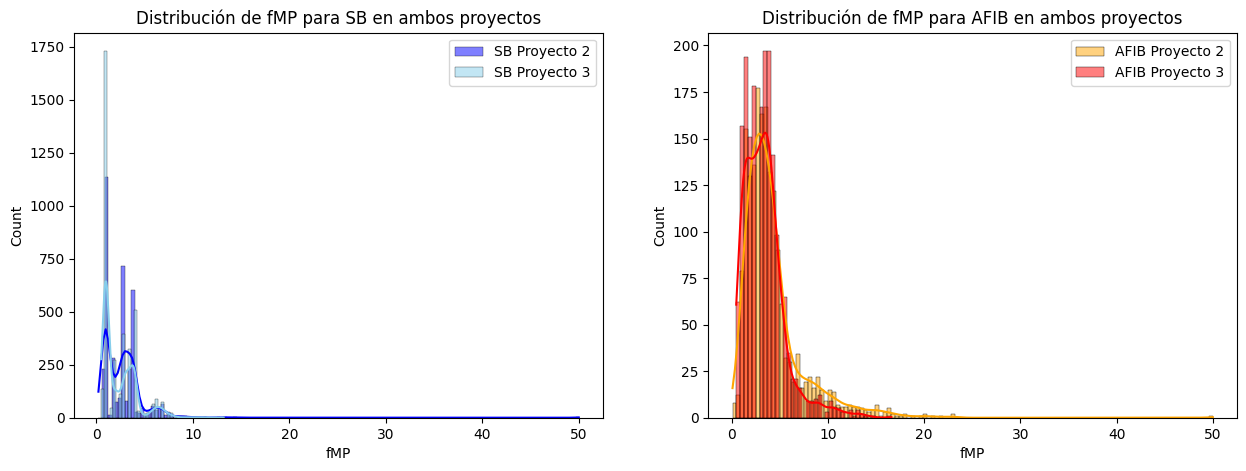

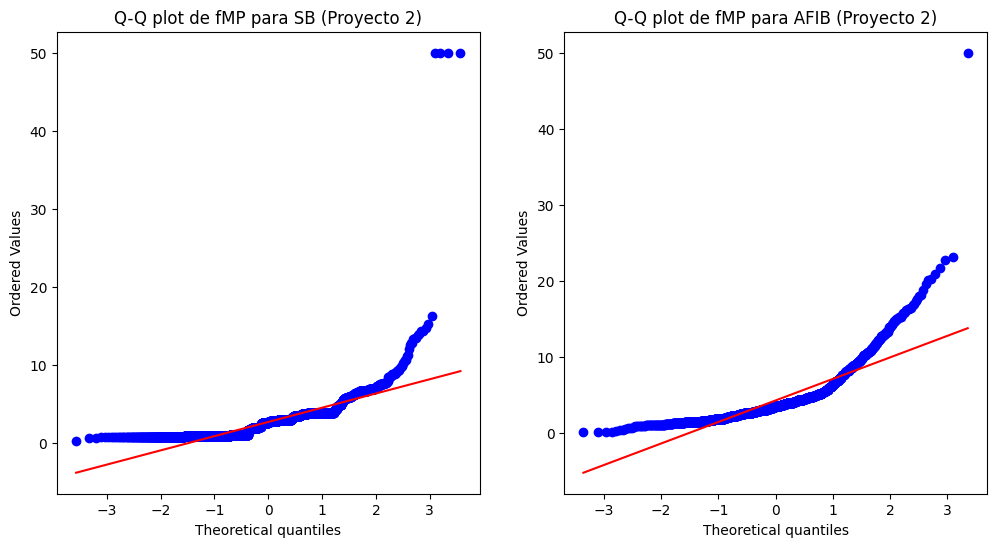

Asimetría y curtosis de fMP:
Proyecto 2: 
 SB
  Skewness=8.82, Kurtosis=160.62
 AFIB
  Skewness=3.35, Kurtosis=25.37

Proyecto 3: 
 SB
  Skewness=1.41, Kurtosis=2.38
 AFIB
  Skewness=1.70, Kurtosis=4.72


In [126]:
import scipy.stats as stats
import seaborn as sns

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(fMp_SB_p2, kde=True, color="blue", label="SB Proyecto 2")
sns.histplot(fMp_SB_p3, kde=True, color="skyblue", label="SB Proyecto 3")
plt.legend()
plt.title('Distribución de fMP para SB en ambos proyectos')

plt.subplot(1, 2, 2)
sns.histplot(fMp_AFIB_p2, kde=True, color="orange", label="AFIB Proyecto 2")
sns.histplot(fMp_AFIB_p3, kde=True, color="red", label="AFIB Proyecto 3")
plt.legend()
plt.title('Distribución de fMP para AFIB en ambos proyectos')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(fMp_SB_p2, dist="norm", plot=plt)
plt.title("Q-Q plot de fMP para SB (Proyecto 2)")

plt.subplot(1, 2, 2)
stats.probplot(fMp_AFIB_p2, dist="norm", plot=plt)
plt.title("Q-Q plot de fMP para AFIB (Proyecto 2)")
plt.show()

print("Asimetría y curtosis de fMP:")
print(f"Proyecto 2: \n SB\n  Skewness={stats.skew(fMp_SB_p2):.2f}, Kurtosis={stats.kurtosis(fMp_SB_p2):.2f}")
print(f" AFIB\n  Skewness={stats.skew(fMp_AFIB_p2):.2f}, Kurtosis={stats.kurtosis(fMp_AFIB_p2):.2f}\n")
print(f"Proyecto 3: \n SB\n  Skewness={stats.skew(fMp_SB_p3):.2f}, Kurtosis={stats.kurtosis(fMp_SB_p3):.2f}")
print(f" AFIB\n  Skewness={stats.skew(fMp_AFIB_p3):.2f}, Kurtosis={stats.kurtosis(fMp_AFIB_p3):.2f}")

De la gráfica de distribuciones de fMP se destaca que se mantiene la misma forma de distribución de frecuencias del Proyecto 2. Para las señales SB se presentan frecuencias más bajas con máxima potencia, en comparación con las frecuencias del Proyecto 2 que tienen una distribución aproximada más uniforme en el rango entre 0 Hz y menos de 10 Hz. Por otro lado, la población con AFIB cuenta con una distribución más dispersa debido a que se tienen menos registros de este grupo. Visualmente, no se presentan mayores diferencias en la distribución de valores de fMP.

El flujo de procesamiento del Proyecto 3 (incluyendo filtros pasa bajas, pasa altas y el uso del periodograma de Welch) parece haber reducido la media y la dispersión de las frecuencias de máxima potencia para ambos tipos de señales. Estos resultados sugieren que el filtro ayuda a enfocar la fMP en un rango de frecuencia más estrecho, eliminando componentes de ruido o de alta frecuencia que podrían influir en los valores de fMP en el Proyecto 2.

##<h4><b>8. </b>Hacer un informe con todos los puntos anteriores.</h4>

<b><u>Conclusiones</u></b>
* De acuerdo a los resultados en la etapa de filtrado, se concluye que la selección de un flujo de filtros adecuado es crucial en la obtención de señales válidas para el análisis espectral y la interpretación fisiológica de registros que describen enfermedades cardíacas o de otra naturaleza. Para el planteamiento del flujo de filytrado se deben considerar los rangos característicos de frecuencia para las señales fisiológicas (ECG en este caso), así como la frecuencia de muestreo y condiciones de obtención de las bioseñales.

* Sobre las frecuencias de máxima potencia (fMP), se destaca que el flujo de filtrado con filtros pasa bajas, pasa altas y wavelet aplicado en este proyecto presentó mejores resultados, en cuanto a la conservación de componentes significativos de la señal y eliminación de artefactos de ruido, en comparación de los obtenidos en el Proyecto 2 donde solo se aplicaron procesos menores de normalización para las señales.

* ...

* ...

#<b>Referencias</b>


<b>[1]:</b> Biosenales y Sistemas. (3 de Octubre, 2024). Proyecto3 en <i>proyecto</i> [Repositorio de GitHub]. biosenalesysistemas. https://github.com/biosenalesysistemas/proyecto

<b>[2]:</b> Zheng, Jianwei (2019). ChapmanECG. figshare. Collection. https://doi.org/10.6084/m9.figshare.c.4560497.v1

<b>[3]:</b> Zheng, J., Chu, H., Struppa, D. et al. Optimal Multi-Stage Arrhythmia Classification Approach. <i>Sci Rep</i> 10, 2898 (2020). https://doi.org/10.1038/s41598-020-59821-7

<b>[4]:</b> Wikipedia. (5 de Diciembre, 2023). <i>Regresión local</i>. Wikipedia, La enciclopedia libre. Recuperado de https://es.wikipedia.org/wiki/Regresi%C3%B3n_local

<b>[5]:</b> Antoni Buades, Bartomeu Coll, and Jean-Michel Morel, <i>Non-Local Means Denoising</i>, Image Processing On Line, 1 (2011), pp. 208–212. https://doi.org/10.5201/ipol.2011.bcm_nlm

<b>[6]:</b> Quintana Morales, H. (2006). <i>Sistema de análisis y clasificación de la señal ECG basado en transformada wavelets</i> (Proyecto fin de carrera). Escuela Universitaria de Ingeniería Técnica de Telecomunicación, Universidad de Las Palmas de Gran Canaria.

<b>[7]:</b> González, J. R., López, R., & Jaramillo, Á. (2016). Wavelets in the analysis of EKG. <i>Scientia et Technica, 21</i>(3), 123-130. Universidad Tecnológica de Pereira. Pereira, Risaralda.

<b>[8]:</b> Pinto Moreno, E. (2012). Anexo I: Familia de wavelets. En <i>Análisis y evaluación de los niveles de energía obtenidos mediante WPT para defectología en ejes</i> (Proyecto fin de carrera). Escuela Politécnica Superior, Departamento de Ingeniería Mecánica, Universidad Carlos III de Madrid.

<b>[9]:</b> Sreedevi, G., & Anuradha, B. (2016). Using of FIR and IIR filters for noise removal from ECG signal: A performance analysis. <i>International Journal of Electronics and Communication Engineering and Technology (IJECET)</i>, 7(4), 91–99. http://iaeme.com/Home/issue/IJECET?Volume=7&Issue=4

<b>[10]:</b> Milchevski, A., Gusev, M. (2018). Performance Evaluation of FIR and IIR Filtering of ECG Signals. In: <i>Stojanov, G., Kulakov, A. (eds) ICT Innovations 2016. ICT Innovations 2016. Advances in Intelligent Systems and Computing</i>, vol 665. Springer, Cham. https://doi.org/10.1007/978-3-319-68855-8_10

<b>[11]:</b> N. Das and M. Chakraborty, "Performance analysis of FIR and IIR filters for ECG signal denoising based on SNR," <i>2017 Third International Conference on Research in Computational Intelligence and Communication Networks (ICRCICN)</i>, Kolkata, India, 2017, pp. 90-97, doi: 10.1109/ICRCICN.2017.8234487.
